# Import some important libraries

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import scale ,minmax_scale ,MinMaxScaler
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Read the dataset

In [8]:
coronavirus_dataframe = pd.read_csv("D:\\Senior 1 - semester 1\\CSE381 - Introduction to Machine Learning\\Project data file\\data.csv" , index_col = 0)
#print(type(coronavirus_dataframe))
#print(coronavirus_dataframe.shape)
#print(coronavirus_dataframe.keys())
#print(coronavirus_dataframe)
coronavirus_dataframe.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [9]:
# Print the information of coronavirus_dataframe
print(coronavirus_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB
None


average age: 49.40000000000031


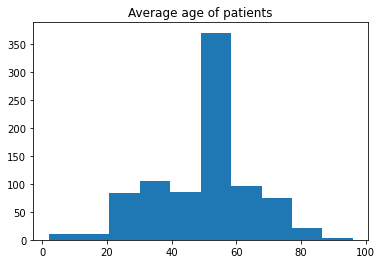

In [10]:
plt.hist(coronavirus_dataframe['age'])
plt.title('Average age of patients')

# calculate average age
print("average age:",coronavirus_dataframe['age'].mean())

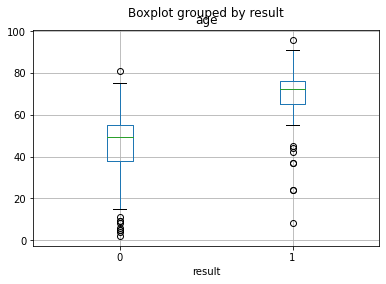

In [11]:
# Create a boxplot of age per result
coronavirus_dataframe.boxplot('age', 'result', rot=0)

# Show the plot
plt.show()

In [12]:
# Column names to check for duplication
column_names = ['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos','result']
duplicates = coronavirus_dataframe.duplicated(subset = column_names, keep = False)

# Output duplicate values
coronavirus_dataframe[duplicates].sort_values(by = 'location')

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
650,9,12,1,32.0,0,0,14,31,19,12,3,1,0,0
617,9,12,1,32.0,0,0,14,31,19,12,3,1,0,0
639,9,12,0,49.4,0,0,14,31,19,12,3,1,0,0
640,9,12,0,49.4,0,0,14,31,19,12,3,1,0,0
641,9,12,1,49.4,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,126,33,2,49.4,1,0,14,31,19,12,3,1,0,0
571,126,33,2,49.4,1,0,14,31,19,12,3,1,0,0
573,126,33,2,49.4,1,0,14,31,19,12,3,1,0,0
763,134,31,2,49.4,1,0,14,31,19,12,3,1,0,0


In [13]:
# Reconvert diff_sym_hos back to categorical
coronavirus_dataframe['diff_sym_hos'] = coronavirus_dataframe['diff_sym_hos'].astype('category')

# Print diff_sym_hos description
print(coronavirus_dataframe['diff_sym_hos'].describe())

count     863
unique     18
top         0
freq      629
Name: diff_sym_hos, dtype: int64


In [14]:
# Convert diff_sym_hos to integer
coronavirus_dataframe['diff_sym_hos'] = coronavirus_dataframe['diff_sym_hos'].astype('int')

# Set all values bellow 0 to 0
coronavirus_dataframe.loc[coronavirus_dataframe['diff_sym_hos'] < 0, 'diff_sym_hos'] = 0

# Reconvert diff_sym_hos back to categorical
coronavirus_dataframe['diff_sym_hos'] = coronavirus_dataframe['diff_sym_hos'].astype('category')

# Print diff_sym_hos description
print(coronavirus_dataframe['diff_sym_hos'].describe())

count     863
unique     16
top         0
freq      631
Name: diff_sym_hos, dtype: int64


In [15]:
# Convert location from integer to category
coronavirus_dataframe['location'] = coronavirus_dataframe['location'].astype('category')

# Convert country from integer to category
coronavirus_dataframe['country'] = coronavirus_dataframe['country'].astype('category')

# Convert gender from integer to category
coronavirus_dataframe['gender'] = coronavirus_dataframe['gender'].astype('category')

# Convert vis_wuhan from integer to category
coronavirus_dataframe['vis_wuhan'] = coronavirus_dataframe['vis_wuhan'].astype('category')

# Convert from_wuhan from integer to category
coronavirus_dataframe['from_wuhan'] = coronavirus_dataframe['from_wuhan'].astype('category')

# Convert symptom1 from integer to category
coronavirus_dataframe['symptom1'] = coronavirus_dataframe['symptom1'].astype('category')

# Convert symptom2 from integer to category
coronavirus_dataframe['symptom2'] = coronavirus_dataframe['symptom2'].astype('category')

# Convert symptom3 from integer to category
coronavirus_dataframe['symptom3'] = coronavirus_dataframe['symptom3'].astype('category')

# Convert symptom4 from integer to category
coronavirus_dataframe['symptom4'] = coronavirus_dataframe['symptom4'].astype('category')

# Convert symptom5 from integer to category
coronavirus_dataframe['symptom5'] = coronavirus_dataframe['symptom5'].astype('category')

# Convert symptom6 from integer to category
coronavirus_dataframe['symptom6'] = coronavirus_dataframe['symptom6'].astype('category')

# # Convert diff_sym_hos to integer
# coronavirus_dataframe['diff_sym_hos'] = coronavirus_dataframe['diff_sym_hos'].astype('int')

# Convert diff_sym_hos to category
coronavirus_dataframe['diff_sym_hos'] = coronavirus_dataframe['diff_sym_hos'].astype('category')

# Convert result from integer to bool
#coronavirus_dataframe['result'] = coronavirus_dataframe['result'].astype('bool')


# Write an assert statement confirming the change
assert coronavirus_dataframe['location'].dtype  == 'category'
assert coronavirus_dataframe['country'].dtype  == 'category'
assert coronavirus_dataframe['gender'].dtype  == 'category'
assert coronavirus_dataframe['vis_wuhan'].dtype  == 'category'
assert coronavirus_dataframe['from_wuhan'].dtype  == 'category'
assert coronavirus_dataframe['symptom1'].dtype  == 'category'
assert coronavirus_dataframe['symptom2'].dtype  == 'category'
assert coronavirus_dataframe['symptom3'].dtype  == 'category'
assert coronavirus_dataframe['symptom4'].dtype  == 'category'
assert coronavirus_dataframe['symptom5'].dtype  == 'category'
assert coronavirus_dataframe['symptom6'].dtype  == 'category'
# assert coronavirus_dataframe['diff_sym_hos'].dtype  == 'int'
assert coronavirus_dataframe['diff_sym_hos'].dtype  == 'category'
# assert coronavirus_dataframe['result'].dtype  == 'bool'


# Print new summary statistics 
print("_________________________________________")
print(coronavirus_dataframe['location'].describe())
print("_________________________________________")
print(coronavirus_dataframe['country'].describe())
print("_________________________________________")
print(coronavirus_dataframe['gender'].describe())
print("_________________________________________")
print(coronavirus_dataframe['age'].describe())
print("_________________________________________")
print(coronavirus_dataframe['vis_wuhan'].describe())
print("_________________________________________")
print(coronavirus_dataframe['from_wuhan'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom1'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom2'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom3'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom4'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom5'].describe())
print("_________________________________________")
print(coronavirus_dataframe['symptom6'].describe())
print("_________________________________________")
print(coronavirus_dataframe['diff_sym_hos'].describe())
print("_________________________________________")
print(coronavirus_dataframe['result'].describe())
print("_________________________________________")

_________________________________________
count     863
unique    139
top       108
freq       85
Name: location, dtype: int64
_________________________________________
count     863
unique     34
top        18
freq      172
Name: country, dtype: int64
_________________________________________
count     863
unique      3
top         1
freq      389
Name: gender, dtype: int64
_________________________________________
count    863.000000
mean      49.400000
std       15.079203
min        2.000000
25%       40.000000
50%       49.400000
75%       57.000000
max       96.000000
Name: age, dtype: float64
_________________________________________
count     863
unique      2
top         0
freq      706
Name: vis_wuhan, dtype: int64
_________________________________________
count     863
unique      2
top         0
freq      770
Name: from_wuhan, dtype: int64
_________________________________________
count     863
unique     25
top        14
freq      644
Name: symptom1, dtype: int64
__________

In [16]:
coronavirus_dataframe.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [17]:
# Print the information of coronavirus_dataframe
print(coronavirus_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   location      863 non-null    category
 1   country       863 non-null    category
 2   gender        863 non-null    category
 3   age           863 non-null    float64 
 4   vis_wuhan     863 non-null    category
 5   from_wuhan    863 non-null    category
 6   symptom1      863 non-null    category
 7   symptom2      863 non-null    category
 8   symptom3      863 non-null    category
 9   symptom4      863 non-null    category
 10  symptom5      863 non-null    category
 11  symptom6      863 non-null    category
 12  diff_sym_hos  863 non-null    category
 13  result        863 non-null    int64   
dtypes: category(12), float64(1), int64(1)
memory usage: 42.4 KB
None


In [18]:
# Create dummy variables: coronavirus_dataframe_with_DV
coronavirus_dataframe_with_DV = pd.get_dummies(coronavirus_dataframe)

# Print the columns of coronavirus_dataframe_with_DV
print(coronavirus_dataframe_with_DV.columns)

coronavirus_dataframe_with_DV.head()

Index(['age', 'result', 'location_0', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7',
       ...
       'diff_sym_hos_6', 'diff_sym_hos_7', 'diff_sym_hos_8', 'diff_sym_hos_9',
       'diff_sym_hos_10', 'diff_sym_hos_11', 'diff_sym_hos_12',
       'diff_sym_hos_13', 'diff_sym_hos_14', 'diff_sym_hos_15'],
      dtype='object', length=294)


,age,result,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Drop one of the dummy variables of each feature from coronavirus_dataframe_with_DV
coronavirus_dataframe_with_DV = pd.get_dummies(coronavirus_dataframe, drop_first=True)

# Print the columns of coronavirus_dataframe_with_DV
print(coronavirus_dataframe_with_DV.columns)

coronavirus_dataframe_with_DV.head()

Index(['age', 'result', 'location_1', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'location_7', 'location_8',
       ...
       'diff_sym_hos_6', 'diff_sym_hos_7', 'diff_sym_hos_8', 'diff_sym_hos_9',
       'diff_sym_hos_10', 'diff_sym_hos_11', 'diff_sym_hos_12',
       'diff_sym_hos_13', 'diff_sym_hos_14', 'diff_sym_hos_15'],
      dtype='object', length=282)


,age,result,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Create arrays for the features and the response variable
target_array = coronavirus_dataframe_with_DV['result'].values
features_array = coronavirus_dataframe_with_DV.drop('result', axis = 1).values
# features_array_withoutScaling = coronavirus_dataframe_with_DV.drop('result', axis = 1).values

# print(features_array_withoutScaling.shape)
# print(target_array.shape)

# # Print the mean and standard deviation of the unscaled features
# print("Mean of Unscaled Features: {}".format(np.mean(features_array_withoutScaling))) 
# print("Standard Deviation of Unscaled Features: {}".format(np.std(features_array_withoutScaling)))

In [21]:
# # Scale the features: features_array
# features_array = minmax_scale(features_array_withoutScaling)

# # Print the mean and standard deviation of the scaled features
# print("Mean of Scaled Features: {}".format(np.mean(features_array))) 
# print("Standard Deviation of Scaled Features: {}".format(np.std(features_array)))

In [22]:
# features_array_withoutScaling_df = pd.DataFrame(data = features_array_withoutScaling)

# features_array_withoutScaling_df.head()

In [23]:
# # Print new summary statistics 
# print("_________________________________________")
# print(features_array_withoutScaling_df[0].describe())
# print("_________________________________________")
# print(features_array_withoutScaling_df[1].describe())
# print("_________________________________________")
# print(features_array_withoutScaling_df[2].describe())
# print("_________________________________________")
# print(features_array_withoutScaling_df[3].describe())
# print("_________________________________________")

In [24]:
# features_array_df = pd.DataFrame(data = features_array)

# features_array_df.head()

In [25]:
# # Print new summary statistics 
# print("_________________________________________")
# print(features_array_df[0].describe())
# print("_________________________________________")
# print(features_array_df[1].describe())
# print("_________________________________________")
# print(features_array_df[2].describe())
# print("_________________________________________")
# print(features_array_df[3].describe())
# print("_________________________________________")

#### In the code above I noticed that the data was dirty and needed to be preprocessed. I started solving this problem by:
- Set all values of the feature 'diff_sym_hos' bellow 0 to 0.
- Converting all features of data from integer data type to category data type except age which is still float.
- Creating dummy variables for each feature.
- Dropping one of the dummy variables of each feature to overcome the problem of multicollinearity (Multicollinearity occurs where there is a dependency between the independent features).
- I also tried scaling the data but the accuracies where better without scaling.


In [26]:
# Create StratifiedKFold object.
skf_tempAndtest = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for temp_index, test_index in skf_tempAndtest.split(features_array, target_array):
    x_temp_fold, x_test_fold = features_array[temp_index], features_array[test_index]
    y_temp_fold, y_test_fold = target_array[temp_index], target_array[test_index]

# Create StratifiedKFold object.
skf_trainAndval = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)

for train_index, val_index in skf_trainAndval.split(x_temp_fold, y_temp_fold):
    x_train_fold, x_val_fold = x_temp_fold[train_index], x_temp_fold[val_index]
    y_train_fold, y_val_fold = y_temp_fold[train_index], y_temp_fold[val_index]
    

print("Train data size:",(len(x_train_fold)/(len(x_train_fold)+len(x_val_fold)+len(x_test_fold)))*100,"%")
print("validation data size:",(len(x_val_fold)/(len(x_train_fold)+len(x_val_fold)+len(x_test_fold)))*100,"%")
print("Test data size:",(len(x_test_fold)/(len(x_train_fold)+len(x_val_fold)+len(x_test_fold)))*100,"%")

print('Total occurences of "0" in target_array: ', (target_array == 0).sum())
print('Total occurences of "1" in target_array: ', (target_array == 1).sum())

print('Total occurences of "0" in y_temp_fold: ', (y_temp_fold == 0).sum())
print('Total occurences of "1" in y_temp_fold: ', (y_temp_fold == 1).sum())

print('Total occurences of "0" in y_train_fold: ', (y_train_fold == 0).sum())
print('Total occurences of "1" in y_train_fold: ', (y_train_fold == 1).sum())

print('Total occurences of "0" in y_val_fold: ', (y_val_fold == 0).sum())
print('Total occurences of "1" in y_val_fold: ', (y_val_fold == 1).sum())

print('Total occurences of "0" in y_test_fold: ', (y_test_fold == 0).sum())
print('Total occurences of "1" in y_test_fold: ', (y_test_fold == 1).sum())

Train data size: 60.139049826187716 %
validation data size: 19.930475086906142 %
Test data size: 19.930475086906142 %
Total occurences of "0" in target_array:  755
Total occurences of "1" in target_array:  108
Total occurences of "0" in y_temp_fold:  604
Total occurences of "1" in y_temp_fold:  87
Total occurences of "0" in y_train_fold:  453
Total occurences of "1" in y_train_fold:  66
Total occurences of "0" in y_val_fold:  151
Total occurences of "1" in y_val_fold:  21
Total occurences of "0" in y_test_fold:  151
Total occurences of "1" in y_test_fold:  21


#### In the code above I splinted the data to approximately 60% training, 20% validation and 20% testing using StratifiedKFold.

# K-Nearest Neighbors

An algorithm that predicts the label of a data point in both classification & regression.   The algorithm stores all available cases & classifies new cases by a "majority vote" of its K-nearest neighbors

**Parameters Used In This Part**
- **n_neighbors** (int, default = 5)**:**  
Number of neighbors to use by default for kneighbors queries.

## Hyperparameter tuning using GridSearchCV 

In [21]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier()

# Print KNeighborsClassifier hyperparameters
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [22]:
# Create the hyperparameter grid
param_Knn = {'n_neighbors': np.arange(1, 25)}

# Instantiate the GridSearchCV object: Grid_knn
Grid_knn = GridSearchCV(estimator = knn, param_grid = param_Knn, scoring='roc_auc', cv = 20, n_jobs = -1)

# Fit it to the training data
Grid_knn.fit(x_train_fold, y_train_fold)

# Print the optimal parameters and best score
print("Tuned K-Nearest Neighbors Parameter: {}".format(Grid_knn.best_params_))
print("Tuned K-Nearest Neighbors Accuracy: {}".format(Grid_knn.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_knn.score(x_val_fold,y_val_fold))

Tuned K-Nearest Neighbors Parameter: {'n_neighbors': 24}
Tuned K-Nearest Neighbors Accuracy: 0.9250082345191043
Test accuracy of best grid search hypers: 0.9230526647745191


In [23]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_knn ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.11111111 0.         0.         0.         0.         0.
 0.125      0.         0.125      0.125      0.125      0.25
 0.125      0.         0.         0.         0.125      0.125
 0.125      0.125      0.125     ]
The mean of the errors is: 0.07671957671957672.
The standard deviation of the errors is: 0.07154482994189039.


In [24]:
# Extract the best model from Grid_knn
Grid_knn_best_model = Grid_knn.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_knn_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test data: y_pred_Grid_knn
y_pred_Grid_knn = Grid_knn_best_model.predict(x_test_fold)

In [25]:
# Generate the confusion matrix and classification report
cm_Grid_knn = confusion_matrix(y_test_fold, y_pred_Grid_knn)
cr_Grid_knn = classification_report(y_test_fold, y_pred_Grid_knn)

print(cm_Grid_knn)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_knn[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_knn[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_knn[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_knn[1, 1]))

print(cr_Grid_knn)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_knn).value_counts())

[[147   4]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 147
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 4
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.83      0.90      0.86        21

    accuracy                           0.97       172
   macro avg       0.91      0.94      0.92       172
weighted avg       0.97      0.97      0.97       172

0    149
1     23
dtype: int64


<img src="https://miro.medium.com/max/566/1*q2ozl-R0bxWXMwWmkERdsQ.png" />

**TN** $->$ **Actual:** negative **,Predicted:** negative


**FP** $->$ **Actual:** negative **,Predicted:** Positive


**FN** $->$ **Actual:** Positive **,Predicted:** negative


**TP** $->$ **Actual:** Positive **,Predicted:** Positive

*positive class: 1* 


*negative class: 0* 

$$ Precision \ of \ the \ positive \ class \ = \frac{TP}{TP + FP} $$

$$ Precision \ of \ the \ negative \ class \ = \frac{TN}{TN + FN} $$

$$ Recall \ of \ the \ positive \ class \ (sensitivity) \ = \frac{TP}{TP + FN} $$

$$ Recall \ of \ the \ negative \ class \ (specificity) \ = \frac{TN}{TN + FP} $$

$$ f1-score \ of \ the \ positive \ class \ = \ 2 * \frac{Precision Of The Positive Class *  Recall Of The Positive Class (Sensitivity)}{Precision Of The Positive Class + Recall Of The Positive Class (Sensitivity)} $$

$$ f1-score \ of \ the \ negative \ class \ = \ 2 * \frac{Precision Of The Negative Class *  Recall Of The Negative Class (Specificity)}{Precision Of The Negative Class + Recall Of The Negative Class (Specificity)} $$

$$ Accuracy = \frac{TN + TP}{TN + TP + FN + FP} $$

$$ Support \ of \ the \ positive \ class \ = FN + TP $$

$$ Support \ of \ the \ negative \ class \ = TN + FP $$

$$ Macro \ Avg \ of \ precision \ = 0.5 * Precision \ of \ the \ negative \ class \ + \ 0.5 * Precision \ of \ the \ positive \ class $$

$$ Macro \ Avg \ of \ Recall \ = 0.5 * Recall \ of \ the \ negative \ class \ + \ 0.5 * Recall \ of \ the \ positive \ class $$

$$ Macro \ Avg \ of \ f1-score \ = 0.5 * f1-score \ of \ the \ negative \ class \ + \ 0.5 * f1-score \ of \ the \ positive \ class $$

$$ Weighted \ Avg \ of \ precision \ =  \frac{Support Of The Negative Class}{Support Of The Negative Class + Support Of The Positive Class} * Precision \ of \ the \ negative \ class \ + \frac{Support Of The Positive Class}{Support Of The Negative Class + Support Of The Positive Class} * Precision \ of \ the \ positive \ class $$

$$ Weighted \ Avg \ of \ Recall \ = \frac{Support Of The Negative Class}{Support Of The Negative Class + Support Of The Positive Class} * Recall \ of \ the \ negative \ class \ + \frac{Support Of The Positive Class}{Support Of The Negative Class + Support Of The Positive Class} * Recall \ of \ the \ positive \ class $$

$$ Weighted \ Avg \ of \ f1-score \ = \frac{Support Of The Negative Class}{Support Of The Negative Class + Support Of The Positive Class} * f1-score \ of \ the \ negative \ class \ + \frac{Support Of The Positive Class}{Support Of The Negative Class + Support Of The Positive Class} * f1-score \ of \ the \ positive \ class $$

- Usually, the "class of interest" is called the positive class. As we are trying to detect death of a patient, this makes death of a patient the positive class. 
- **Percision** (positive predictive value) is used when we don't want to overpredict positive values. In our case this is the number of correctly labeled death of a patient divided by the total number of patients classified as dead. 
- High percision means that our classifier had a low false positive rate, that is, not many recoverd patients were predicted as being dead. 
- **Recall** (sensitivity, hit rate or true positive rate) is about finding all positive values and is used when we can't afford to miss any positive values. 
- High recall means that our classifier predicted most positive or dead patients correctly. 
- **F1score** is the harmonic mean of percision and recall.
- **Support** is the number of occurrences of each class in the actual labels.
- **Accuracy** is an error measure of the confusion matrix that is percentage of correct classifications, over the total number of samples.

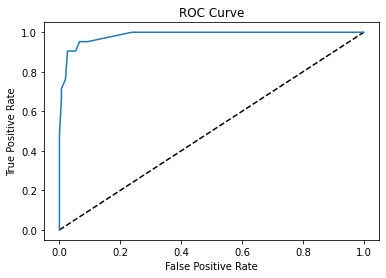

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.08333333 0.08333333 0.08333333 0.         0.         0.58333333
 0.         0.         0.08333333 0.08333333]


In [26]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_Grid_knn = Grid_knn_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Grid_knn)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_knn[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_knn[0:10]))

In [27]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Grid_knn)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_knn_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9843897824030275
AUC scores computed using 108-fold cross-validation: [0.92857143 0.28571429 0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.42857143 0.85714286 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.92857143 1.         0.92857143 1.         0.85714286 0.78571429
 0.92857143 0.85714286 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.92857143 0.42857143 1.         0.71428571 0.71428571
 1.         1.         1.         0.42857143 0.92857143 0.92857143
 1.         1.         0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 1.         1.         1.         1.
 1.         1.

## Hyperparameter tuning by iteration

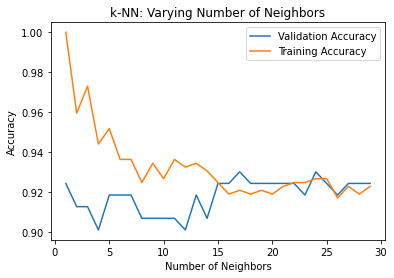

In [28]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
validation_accuracy = np.empty(len(neighbors))   
    
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_test = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn_test.fit(x_train_fold,y_train_fold)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_test.score(x_train_fold, y_train_fold)

    #Compute accuracy on the testing set
    validation_accuracy[i] = knn_test.score(x_val_fold,y_val_fold)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, validation_accuracy, label = 'Validation Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Setup a k-NN Classifier with k neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 24)

# Fit the classifier to the training data
knn.fit(x_temp_fold,y_temp_fold)

# Predict the labels of the test data: y_pred_knn
y_pred_knn = knn.predict(x_test_fold)

In [30]:
# Generate the confusion matrix and classification report
cm_knn = confusion_matrix(y_test_fold, y_pred_knn)
cr_knn = classification_report(y_test_fold, y_pred_knn)

print(cm_knn)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_knn[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_knn[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_knn[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_knn[1, 1]))

print(cr_knn)

# Print out count of binary predictions
print(pd.Series(y_pred_knn).value_counts())



[[147   4]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 147
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 4
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.83      0.90      0.86        21

    accuracy                           0.97       172
   macro avg       0.91      0.94      0.92       172
weighted avg       0.97      0.97      0.97       172

0    149
1     23
dtype: int64


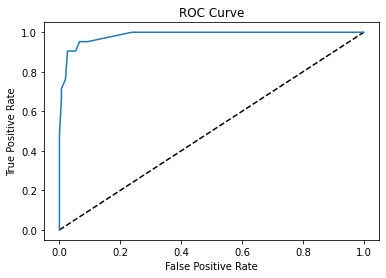

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.08333333 0.08333333 0.08333333 0.         0.         0.58333333
 0.         0.         0.08333333 0.08333333]


In [31]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_knn = knn.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_knn)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_knn[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_knn[0:10]))

In [32]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_knn)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = knn ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9843897824030275
AUC scores computed using 108-fold cross-validation: [0.92857143 0.28571429 0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.42857143 0.85714286 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.92857143 1.         0.92857143 1.         0.85714286 0.78571429
 0.92857143 0.85714286 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.92857143 0.42857143 1.         0.71428571 0.71428571
 1.         1.         1.         0.42857143 0.92857143 0.92857143
 1.         1.         0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 1.         1.         1.         1.
 1.         1.

# logistic regression

- A classification algorithm used to estimate discrete values, binary values (0/1, yes/no, true/false) based on given set of independent variables; predicts probability between 0 & 1 as output values.
- Like its name is logarithmic. Its graph is curvilinear. The dependent variable may be binomial, ordinal or multinomial. If the dependent variable is binary, the graph is sigmoid. If not, the graph can be more pronounced, parabolic, etc.
- Models are fitted using the method of maximum likelihood - i.e. the parameter estimates are those which maximize the likelihood of the data which have been observed.

**Parameters Used In This Part**
- **penalty** ({‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’):\
Specify the norm of the penalty:
  - 'none': no penalty is added;
  - 'l2': add a L2 penalty term and it is the default choice;
  - 'l1': add a L1 penalty term;
  - 'elasticnet': both L1 and L2 penalty terms are added.
- **C** (float, default=1.0):\
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

## Hyperparameter tuning using GridSearchCV 

In [33]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter = 3000)

# Print logistic regression hyperparameters
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [34]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_logreg = {'C': c_space, 'penalty': ['l2' or 'none' or 'l1']}
#param_logreg = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2' or 'none' or 'l1']}

# Instantiate the GridSearchCV object: Grid_logreg
Grid_logreg = GridSearchCV(estimator = logreg , param_grid = param_logreg, scoring='roc_auc', cv = 10, n_jobs = -1)

# Fit it to the training data
Grid_logreg.fit(x_train_fold,y_train_fold)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(Grid_logreg.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(Grid_logreg.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_logreg.score(x_val_fold,y_val_fold))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9599459397285486
Test accuracy of best grid search hypers: 0.955534531693472


In [35]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_logreg ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.    0.    0.    0.    0.    0.125 0.125 0.    0.125 0.    0.    0.25
 0.25  0.    0.    0.    0.125 0.125 0.125 0.125 0.125]
The mean of the errors is: 0.07142857142857142.
The standard deviation of the errors is: 0.08247860988423227.


In [36]:
# Extract the best model from Grid_knn
Grid_logreg_best_model = Grid_logreg.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_logreg_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test set: y_pred_Grid_logreg
y_pred_Grid_logreg = Grid_logreg_best_model.predict(x_test_fold)

In [37]:
# Generate the confusion matrix and classification report
cm_Grid_logreg = confusion_matrix(y_test_fold, y_pred_Grid_logreg)
cr_Grid_logreg = classification_report(y_test_fold, y_pred_Grid_logreg)

print(cm_Grid_logreg)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_logreg[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_logreg[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_logreg[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_logreg[1, 1]))

print(cr_Grid_logreg)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_logreg).value_counts())

[[148   3]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       151
           1       0.86      0.86      0.86        21

    accuracy                           0.97       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.97      0.97      0.97       172

0    151
1     21
dtype: int64


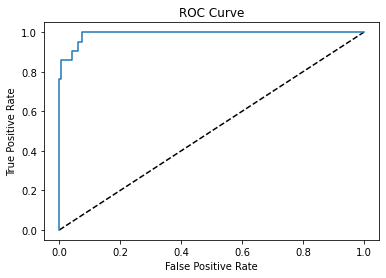

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [1.36090558e-01 6.94347807e-03 1.76319202e-04 1.75531893e-04
 3.38193795e-04 1.85666450e-01 8.62675271e-06 2.89073942e-05
 3.96581224e-01 1.51617976e-03]


In [38]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_Grid_logreg = Grid_logreg_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Grid_logreg)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_logreg[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_logreg[0:10]))

In [39]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Grid_logreg)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_logreg_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9911699779249448
AUC scores computed using 108-fold cross-validation: [0.85714286 1.         1.         1.         1.         0.85714286
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.85714286 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.85714286 1.         1.         1.
 1.         1.         1.         0.85714286 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.57142857 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.     

# Decision Trees

A sequence of if/else questions about individual features with the objective of inferring labels. Trees are capable of capturing non-linear relationships between features & labels. Trees do not require feature scaling such as standardization.

- **Decision Tree:** A data structure consisting of a hierarchy of Nodes (questions or predictions):
  - **Nodes:** Grown recursively - based on the known state of its predecessors.
  - **Root:** It is the position at which the decision tree starts growing; has no parent node & is a question giving rise to two children nodes.
  - **Internal Node:** Has one parent & gives rise to two children.
  - **Leaf:** Has one parent node & no children; it is where a prediction is made.

- **Maximum Depth:** Maximum # of branches separating the top from an extreme end.
- **Decision Region:** Region in the feature space where all instances are assigned to one class label.
- **Decision Boundary:** Surface separating different decision regions.

<img src = "https://www.ryangineer.com/assets/img-decision-tree.png" />

**Limitations of CARTs**
- Classification: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- High variance: unconstrained CARTs may overfit the training set.

**Parameters Used In This Part**
- **criterion** ({“gini”, “entropy”}, default=”gini”):\
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- **max_depth** (int, default=None):\
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_leaf** (int or float, default=1):\
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
- **max_features** (int, float or {“auto”, “sqrt”, “log2”}, default=None):\
The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- **random_state** (int, RandomState instance or None, default=None):\
Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.

## Hyperparameter tuning using RandomizedSearchCV 

In [40]:
# Setup the parameters and distributions to sample from: param_dist
# param_dist = {"max_depth": [None, 1,2,3,4,5,6,7,8,9,10],
#               "max_features": randint(1, 10),
#               "min_samples_leaf": randint(1, 10),
#               "criterion": ["gini", "entropy"]}
param_dist = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
             "min_samples_leaf": [0.04, 0.06, 0.08],
             "max_features": [0.2, 0.4,0.6, 0.8],
             "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: dt
dt = DecisionTreeClassifier(random_state = 17)

# Instantiate the RandomizedSearchCV object: Randomized_dt
Randomized_dt = RandomizedSearchCV(estimator = dt, param_distributions = param_dist, scoring = 'roc_auc' , n_iter = 140, cv = 20 , n_jobs = -1, random_state = 7)

# Fit it to the data
Randomized_dt.fit(x_train_fold,y_train_fold)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(Randomized_dt.best_params_))
print("Best score is {}".format(Randomized_dt.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Randomized_dt.score(x_val_fold,y_val_fold))

Tuned Decision Tree Parameters: {'min_samples_leaf': 0.08, 'max_features': 0.8, 'max_depth': 9, 'criterion': 'entropy'}
Best score is 0.9331357048748353
Test accuracy of best grid search hypers: 0.924156417533901


In [41]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Randomized_dt ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.         0.         0.33333333 0.         0.         0.
 0.125      0.         0.125      0.125      0.125      0.25
 0.125      0.125      0.         0.         0.125      0.125
 0.125      0.125      0.125     ]
The mean of the errors is: 0.09325396825396826.
The standard deviation of the errors is: 0.08806484532211169.


In [42]:
# Extract the best model from Grid_dt
Randomized_dt_best_model = Randomized_dt.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Randomized_dt_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test set: y_pred
y_pred_Randomized_dt = Randomized_dt_best_model.predict(x_test_fold)

In [43]:
# Generate the confusion matrix and classification report
cm_Randomized_dt = confusion_matrix(y_test_fold, y_pred_Randomized_dt)
cr_Randomized_dt = classification_report(y_test_fold, y_pred_Randomized_dt)

print(cm_Randomized_dt)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Randomized_dt[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Randomized_dt[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Randomized_dt[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Randomized_dt[1, 1]))

print(cr_Randomized_dt)

# Print out count of binary predictions
print(pd.Series(y_pred_Randomized_dt).value_counts())

[[146   5]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 146
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 5
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.79      0.90      0.84        21

    accuracy                           0.96       172
   macro avg       0.89      0.94      0.91       172
weighted avg       0.96      0.96      0.96       172

0    148
1     24
dtype: int64


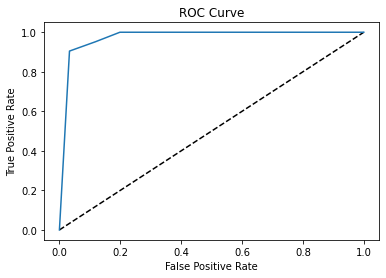

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.03571429 0.10714286 0.         0.         0.         0.72368421
 0.03389831 0.03389831 0.10714286 0.        ]


In [44]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_Randomized_dt = Randomized_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Randomized_dt)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Randomized_dt[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Randomized_dt[0:10]))

In [45]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Randomized_dt)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9738252917060864
AUC scores computed using 108-fold cross-validation: [0.92857143 0.85714286 0.92857143 1.         1.         0.64285714
 0.78571429 1.         1.         1.         0.92857143 1.
 1.         1.         1.         1.         1.         0.92857143
 1.         1.         1.         0.92857143 1.         1.
 0.92857143 1.         1.         1.         1.         1.
 1.         1.         0.85714286 0.92857143 1.         1.
 0.92857143 1.         0.92857143 0.85714286 0.92857143 0.78571429
 0.92857143 0.92857143 1.         1.         1.         1.
 0.92857143 1.         0.85714286 0.92857143 0.92857143 0.92857143
 0.85714286 1.         1.         1.         1.         1.
 0.92857143 0.85714286 0.28571429 0.21428571 0.85714286 0.
 1.         1.         1.         0.57142857 0.92857143 1.
 1.         1.         0.92857143 1.         1.         0.92857143
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 0.85714286 0.78571429 1.         0

### Visualizing Decision Trees

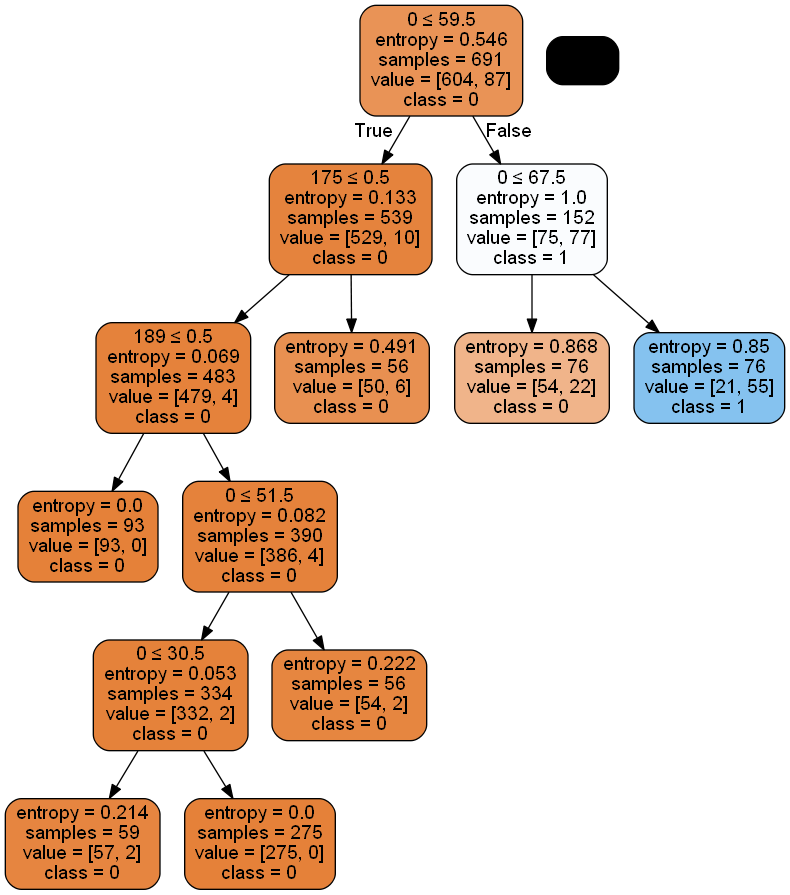

In [46]:
features_array_df = pd.DataFrame(data = features_array)
feature_cols = features_array_df.columns.to_list()

dot_data = StringIO()
export_graphviz(Randomized_dt_best_model, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("coronavirus_dataframe DT.png")
Image(graph.create_png())

## Hyperparameter tuning using GridSearchCV

In [29]:
# Instantiate a Decision Tree classifier: dt
dt = DecisionTreeClassifier(random_state = 17)

# Print Decision Trees hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 17, 'splitter': 'best'}


In [30]:
# Setup the parameters and distributions to sample from: params_dt
# params_dt = {"max_depth": [None, 1,2,3,4,5,6,7,8,9,10],
#               "max_features": [1,2,3,4,5,6,7,8,9,10],
#               "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#               "criterion": ["gini", "entropy"]}
params_dt = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
             "min_samples_leaf": [0.04, 0.06, 0.08],
             "max_features": [0.2, 0.4,0.6, 0.8],
             "criterion": ["gini", "entropy"]}


# Instantiate the GridSearchCV object: Grid_dt
Grid_dt = GridSearchCV(estimator = dt , param_grid = params_dt , scoring = 'roc_auc' , cv = 20 , n_jobs = -1)

# Fit it to the training data
Grid_dt.fit(x_train_fold,y_train_fold)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(Grid_dt.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(Grid_dt.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_dt.score(x_val_fold,y_val_fold))

Tuned Decision Tree Parameter: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.08}
Tuned Decision Tree Accuracy: 0.9331357048748353
Test accuracy of best grid search hypers: 0.924156417533901


In [31]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_dt ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.         0.         0.33333333 0.         0.         0.
 0.125      0.         0.125      0.125      0.125      0.25
 0.125      0.125      0.         0.         0.125      0.125
 0.125      0.125      0.125     ]
The mean of the errors is: 0.09325396825396826.
The standard deviation of the errors is: 0.08806484532211169.


In [32]:
# Extract the best model from Grid_dt
Grid_dt_best_model = Grid_dt.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_dt_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test data: y_pred_Grid_knn
y_pred_Grid_dt = Grid_dt_best_model.predict(x_test_fold)

In [33]:
# Generate the confusion matrix and classification report
cm_Grid_dt = confusion_matrix(y_test_fold, y_pred_Grid_dt)
cr_Grid_dt = classification_report(y_test_fold, y_pred_Grid_dt)

print(cm_Grid_dt)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_dt[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_dt[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_dt[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_dt[1, 1]))

print(cr_Grid_dt)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_dt).value_counts())

[[146   5]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 146
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 5
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.79      0.90      0.84        21

    accuracy                           0.96       172
   macro avg       0.89      0.94      0.91       172
weighted avg       0.96      0.96      0.96       172

0    148
1     24
dtype: int64


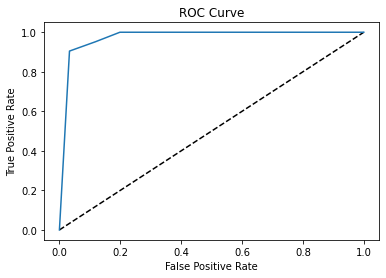

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.03571429 0.10714286 0.00598802 0.00598802 0.00598802 0.72368421
 0.00598802 0.00598802 0.10714286 0.00598802]


In [34]:
# Compute predicted probabilities: y_pred_prob_Grid_dt
y_pred_prob_Grid_dt = Grid_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Grid_dt)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_dt[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_dt[0:10]))

In [35]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Grid_dt)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9738252917060864
AUC scores computed using 108-fold cross-validation: [0.92857143 0.85714286 0.92857143 1.         1.         0.64285714
 0.78571429 1.         1.         1.         0.92857143 1.
 1.         1.         1.         1.         1.         0.92857143
 1.         1.         1.         0.92857143 1.         1.
 0.92857143 1.         1.         1.         1.         1.
 1.         1.         0.85714286 0.92857143 1.         1.
 0.71428571 1.         0.92857143 0.85714286 0.85714286 0.78571429
 0.92857143 0.92857143 1.         1.         1.         1.
 0.92857143 1.         0.85714286 0.92857143 0.92857143 0.92857143
 0.85714286 1.         1.         1.         1.         1.
 0.92857143 0.85714286 0.28571429 0.21428571 1.         0.
 1.         1.         1.         0.57142857 0.92857143 1.
 1.         1.         0.92857143 1.         1.         0.92857143
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 0.85714286 0.78571429 1.         0

### Visualizing Decision Trees

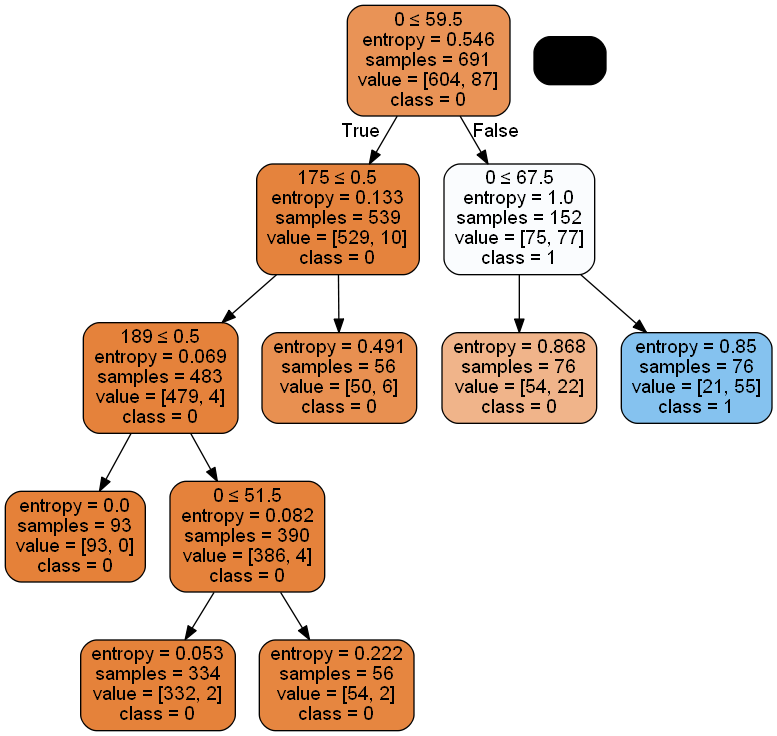

In [39]:
features_array_df = pd.DataFrame(data = features_array)
feature_cols = features_array_df.columns.to_list()

dot_data = StringIO()
export_graphviz(Grid_dt_best_model, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("coronavirus_dataframe DT.png")
Image(graph.create_png())

# Support Vector Machines

Discriminative classifier formally defined by a separating hyperplane.

**Parameters Used In This Part**
- **C** (float, default = 1.0):\
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- **gamma** ({‘scale’, ‘auto’} or float, default=’scale’):\
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
  - if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  - if ‘auto’, uses 1 / n_features.

## Hyperparameter tuning using GridSearchCV 

### Using Non-Linear SVC

In [54]:
# Instantiate an RBF SVM
NonLinear_svm = SVC(probability=True)

# Print NonLinear SVC hyperparameters
print(NonLinear_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [55]:
# Create the hyperparameter grid
param_NonLinear_svm = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

# Instantiate the GridSearchCV object: Grid_NonLinear_svm
Grid_NonLinear_svm = GridSearchCV(estimator = NonLinear_svm , param_grid = param_NonLinear_svm, scoring='roc_auc', cv = 20, n_jobs = -1)

# Fit it to the training data
Grid_NonLinear_svm.fit(x_train_fold,y_train_fold)

# Print the optimal parameters and best score
print("Tuned Non-Linear SVC Parameter: {}".format(Grid_NonLinear_svm.best_params_))
print("Tuned Non-Linear SVC Accuracy: {}".format(Grid_NonLinear_svm.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_NonLinear_svm.score(x_val_fold,y_val_fold))

Tuned Non-Linear SVC Parameter: {'C': 10, 'gamma': 0.01}
Tuned Non-Linear SVC Accuracy: 0.9735589591567851
Test accuracy of best grid search hypers: 0.9536423841059603


In [56]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_NonLinear_svm ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.         0.11111111 0.         0.11111111 0.         0.125
 0.125      0.         0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.         0.125      0.
 0.125      0.         0.125     ]
The mean of the errors is: 0.08201058201058202.
The standard deviation of the errors is: 0.0581258532876186.


In [57]:
# Extract the best model from Grid_NonLinear_svm
Grid_NonLinear_svm_best_model = Grid_NonLinear_svm.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_NonLinear_svm_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test set: y_pred_Grid_NonLinear_svm
y_pred_Grid_NonLinear_svm = Grid_NonLinear_svm_best_model.predict(x_test_fold)

In [58]:
# Generate the confusion matrix and classification report
cm_Grid_NonLinear_svm = confusion_matrix(y_test_fold, y_pred_Grid_NonLinear_svm)
cr_Grid_NonLinear_svm = classification_report(y_test_fold, y_pred_Grid_NonLinear_svm)

print(cm_Grid_NonLinear_svm)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_NonLinear_svm[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_NonLinear_svm[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_NonLinear_svm[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_NonLinear_svm[1, 1]))

print(cr_Grid_NonLinear_svm)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_NonLinear_svm).value_counts())

[[148   3]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       151
           1       0.86      0.90      0.88        21

    accuracy                           0.97       172
   macro avg       0.93      0.94      0.93       172
weighted avg       0.97      0.97      0.97       172

0    150
1     22
dtype: int64


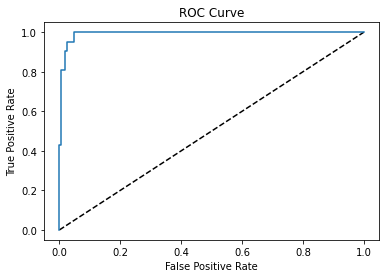

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.02390766 0.06105258 0.02863522 0.03407103 0.03552515 0.70125667
 0.03390282 0.03200053 0.03622696 0.0314505 ]


In [59]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_Grid_NonLinear_svm = Grid_NonLinear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Grid_NonLinear_svm)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_NonLinear_svm[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_NonLinear_svm[0:10]))

In [60]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Grid_NonLinear_svm)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_NonLinear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9921160517187008
AUC scores computed using 108-fold cross-validation: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.85714286 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.14285714 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.85714286 1.         1.         0.85714286
 1.         1.         1.         0.57142857 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.     

### Using Linear SVC

In [61]:
# Instantiate an RBF SVM
Linear_svm = SVC(kernel="linear",probability=True)

# Print Linear SVC hyperparameters
print(Linear_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [62]:
# Create the hyperparameter grid
param_Linear_svm = {'C':[0.1, 1, 10]}

# Instantiate the GridSearchCV object: Grid_Linear_svm
Grid_Linear_svm = GridSearchCV(estimator = Linear_svm , param_grid = param_Linear_svm, scoring='roc_auc', cv = 10, n_jobs = -1)

# Fit it to the training data
Grid_Linear_svm.fit(x_train_fold,y_train_fold)

# Print the optimal parameters and best score
print("Tuned Linear SVC Parameter: {}".format(Grid_Linear_svm.best_params_))
print("Tuned Linear SVC Accuracy: {}".format(Grid_Linear_svm.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_Linear_svm.score(x_val_fold,y_val_fold))

Tuned Linear SVC Parameter: {'C': 1}
Tuned Linear SVC Accuracy: 0.9582240625718889
Test accuracy of best grid search hypers: 0.9321980447808262


In [63]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_Linear_svm ,X = x_val_fold, y = y_val_fold, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results ))
print("The standard deviation of the errors is: %s." % np.std(cv_results ))

[0.    0.    0.    0.    0.    0.125 0.    0.    0.125 0.    0.    0.25
 0.25  0.    0.    0.    0.25  0.125 0.125 0.125 0.125]
The mean of the errors is: 0.07142857142857142.
The standard deviation of the errors is: 0.09105391988558545.


In [64]:
# Extract the best model from Grid_Linear_svm
Grid_Linear_svm_best_model = Grid_Linear_svm.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_Linear_svm_best_model.fit(x_temp_fold , y_temp_fold)

# Predict the labels of the test set: y_pred_Grid_NonLinear_svm
y_pred_Grid_Linear_svm = Grid_Linear_svm_best_model.predict(x_test_fold)

In [65]:
# Generate the confusion matrix and classification report
cm_Grid_Linear_svm = confusion_matrix(y_test_fold, y_pred_Grid_Linear_svm)
cr_Grid_Linear_svm = classification_report(y_test_fold, y_pred_Grid_Linear_svm)

print(cm_Grid_Linear_svm)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_Linear_svm[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_Linear_svm[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_Linear_svm[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_Linear_svm[1, 1]))

print(cr_Grid_Linear_svm)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_Linear_svm).value_counts())

[[149   2]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       151
           1       0.90      0.86      0.88        21

    accuracy                           0.97       172
   macro avg       0.94      0.92      0.93       172
weighted avg       0.97      0.97      0.97       172

0    152
1     20
dtype: int64


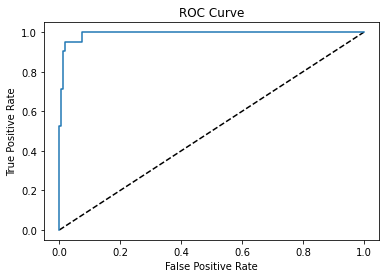

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [2.56988982e-01 7.16278252e-03 2.55565802e-04 2.03834161e-04
 7.50055852e-04 3.36915982e-01 3.99863238e-05 3.83270198e-05
 3.63622152e-01 3.79075926e-03]


In [66]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_Grid_Linear_svm = Grid_Linear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_Grid_Linear_svm)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_Linear_svm[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_Linear_svm[0:10]))

In [67]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_Grid_Linear_svm)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_Linear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9918006937874487
AUC scores computed using 108-fold cross-validation: [0.85714286 1.         1.         1.         1.         0.85714286
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.85714286
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.57142857 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        

# Gaussian Naive Bayes classifier

Probabilistic classifier based on Bayes Theorem with an assumption of independence between predictors (aka, features or independent variables).

**Parameters Used In This Part**
- **var_smoothing** (float, default=1e-9):\
Portion of the largest variance of all features that is added to variances for calculation stability.

## Hyperparameter tuning using GridSearchCV 

In [68]:
coronavirus_dataframe_v2 = pd.read_csv("D:\\Senior 1 - semester 1\\CSE381 - Introduction to Machine Learning\\Project data file\\data.csv" , index_col = 0)

coronavirus_dataframe_v2.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


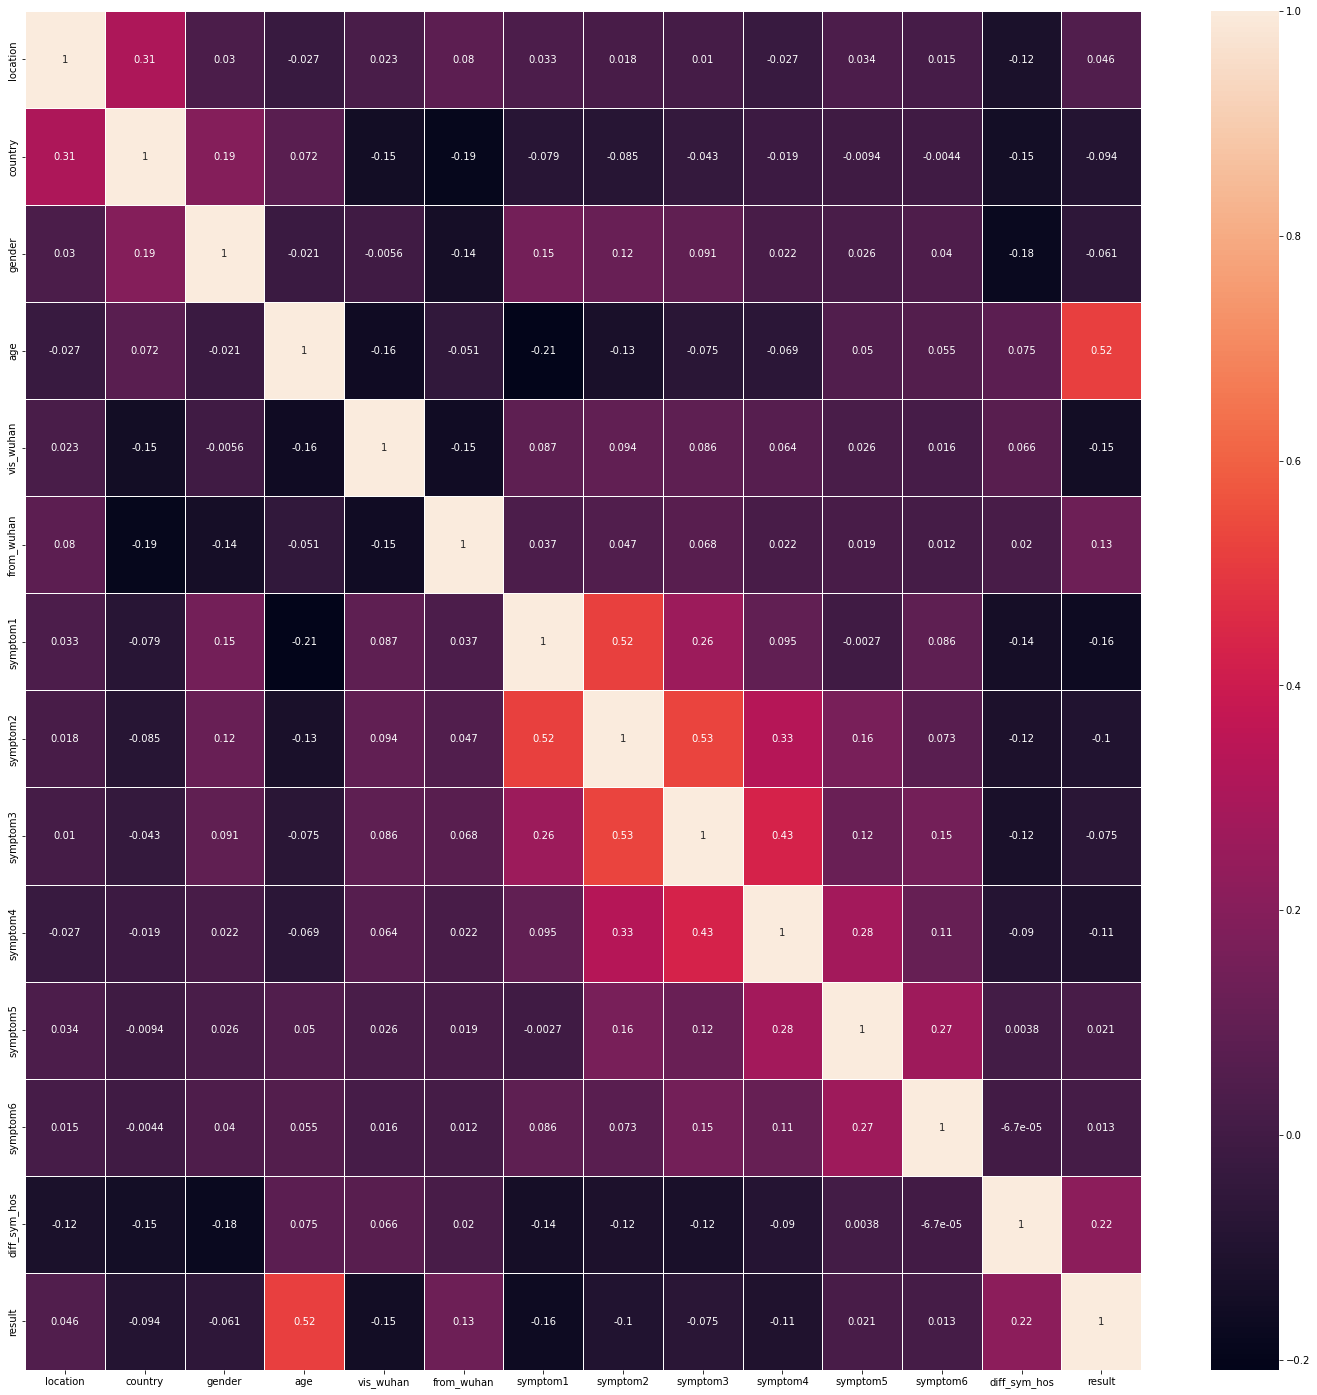

In [69]:
# Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
corrMatrix_v1 = coronavirus_dataframe_v2.corr()

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,25)) 

sn.heatmap(corrMatrix_v1, annot=True, linewidths=.5, ax=ax)
plt.show()

In [70]:
# Removeing symptom2 from coronavirus_dataframe
coronavirus_dataframe_No_symptom2 = coronavirus_dataframe_v2.drop(["symptom2"], axis = 1)

coronavirus_dataframe_No_symptom2.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,19,12,3,1,0,0


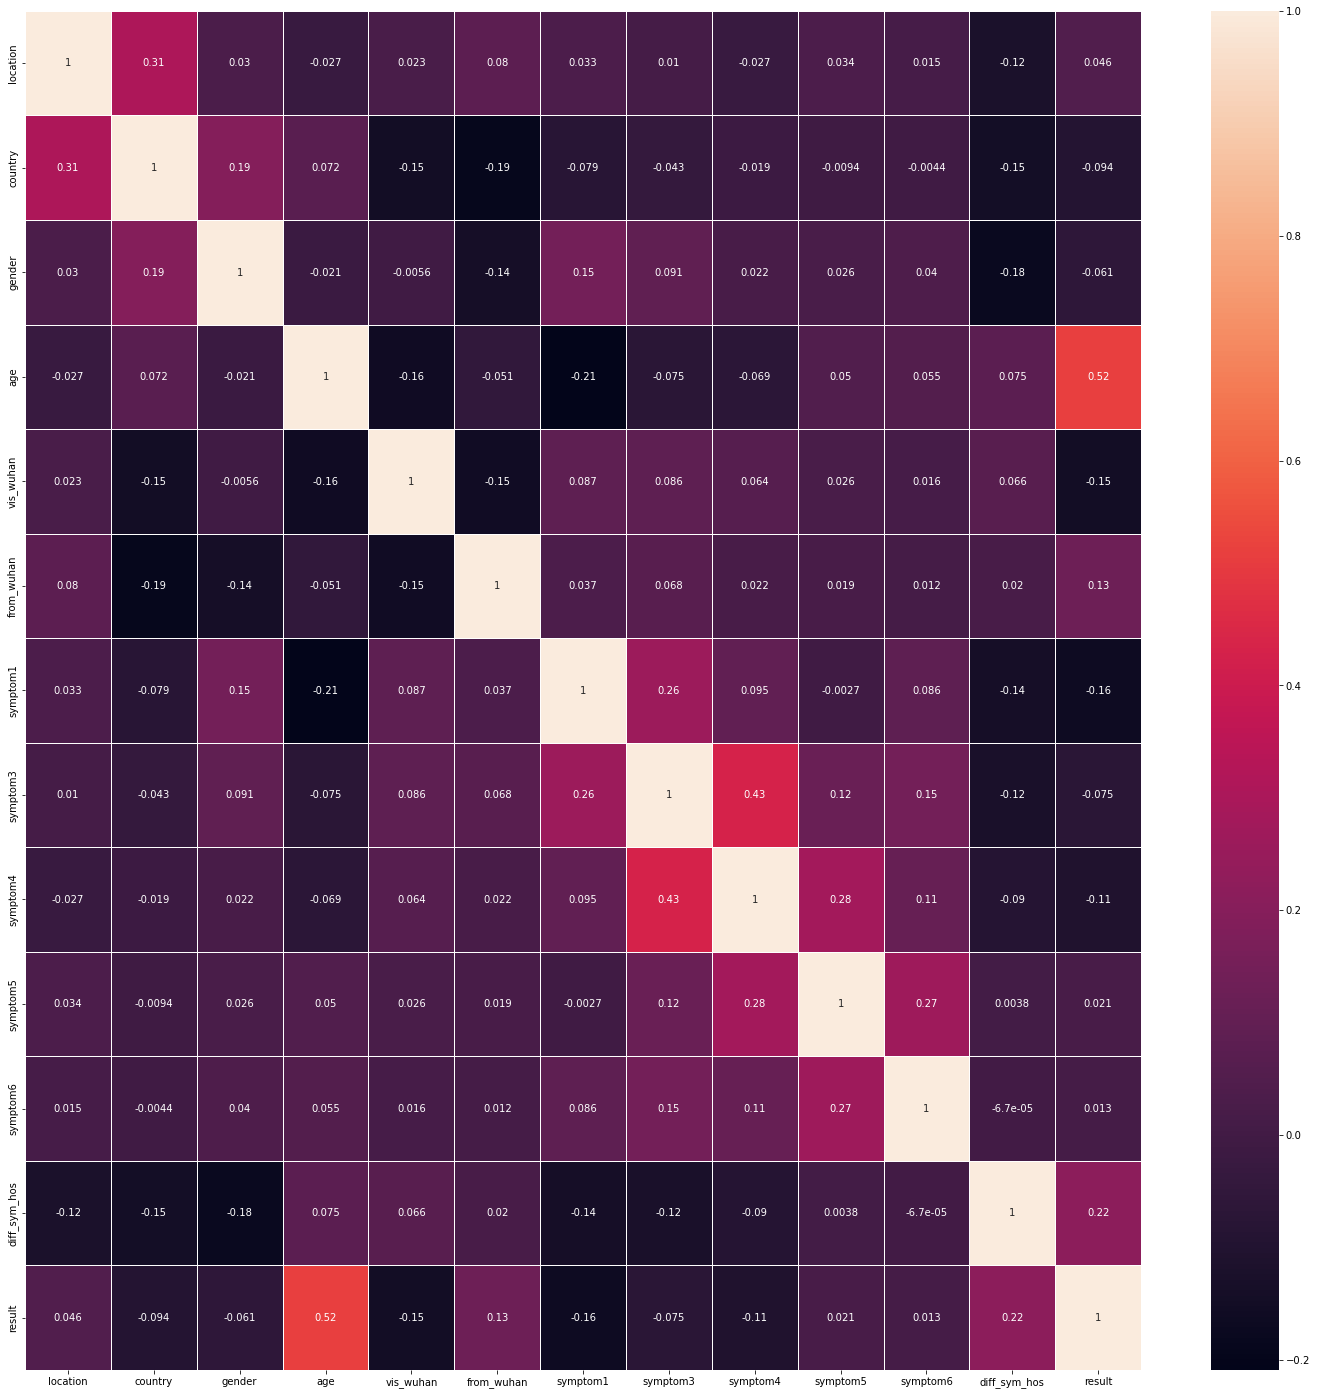

In [71]:
# Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
corrMatrix_v2 = coronavirus_dataframe_No_symptom2.corr()

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,25)) 

sn.heatmap(corrMatrix_v2, annot=True, linewidths=.5, ax=ax)
plt.show()

In [72]:
print(coronavirus_dataframe_No_symptom2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom3      863 non-null    int64  
 8   symptom4      863 non-null    int64  
 9   symptom5      863 non-null    int64  
 10  symptom6      863 non-null    int64  
 11  diff_sym_hos  863 non-null    int64  
 12  result        863 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 94.4 KB
None


In [73]:
# Reconvert diff_sym_hos back to categorical
coronavirus_dataframe_No_symptom2['diff_sym_hos'] = coronavirus_dataframe_No_symptom2['diff_sym_hos'].astype('category')

# Print diff_sym_hos description
print(coronavirus_dataframe_No_symptom2['diff_sym_hos'].describe())

count     863
unique     18
top         0
freq      629
Name: diff_sym_hos, dtype: int64


In [74]:
# Convert diff_sym_hos to integer
coronavirus_dataframe_No_symptom2['diff_sym_hos'] = coronavirus_dataframe_No_symptom2['diff_sym_hos'].astype('int')

# Set all values bellow 0 to 0
coronavirus_dataframe_No_symptom2.loc[coronavirus_dataframe_No_symptom2['diff_sym_hos'] < 0, 'diff_sym_hos'] = 0

# Reconvert diff_sym_hos back to categorical
coronavirus_dataframe_No_symptom2['diff_sym_hos'] = coronavirus_dataframe_No_symptom2['diff_sym_hos'].astype('category')

# Print diff_sym_hos description
print(coronavirus_dataframe_No_symptom2['diff_sym_hos'].describe())

count     863
unique     16
top         0
freq      631
Name: diff_sym_hos, dtype: int64


In [75]:
# Convert location from integer to category
coronavirus_dataframe_No_symptom2['location'] = coronavirus_dataframe_No_symptom2['location'].astype('category')

# Convert country from integer to category
coronavirus_dataframe_No_symptom2['country'] = coronavirus_dataframe_No_symptom2['country'].astype('category')

# Convert gender from integer to category
coronavirus_dataframe_No_symptom2['gender'] = coronavirus_dataframe_No_symptom2['gender'].astype('category')

# Convert vis_wuhan from integer to category
coronavirus_dataframe_No_symptom2['vis_wuhan'] = coronavirus_dataframe_No_symptom2['vis_wuhan'].astype('category')

# Convert from_wuhan from integer to category
coronavirus_dataframe_No_symptom2['from_wuhan'] = coronavirus_dataframe_No_symptom2['from_wuhan'].astype('category')

# Convert symptom1 from integer to category
coronavirus_dataframe_No_symptom2['symptom1'] = coronavirus_dataframe_No_symptom2['symptom1'].astype('category')

# Convert symptom3 from integer to category
coronavirus_dataframe_No_symptom2['symptom3'] = coronavirus_dataframe_No_symptom2['symptom3'].astype('category')

# Convert symptom4 from integer to category
coronavirus_dataframe_No_symptom2['symptom4'] = coronavirus_dataframe_No_symptom2['symptom4'].astype('category')

# Convert symptom5 from integer to category
coronavirus_dataframe_No_symptom2['symptom5'] = coronavirus_dataframe_No_symptom2['symptom5'].astype('category')

# Convert symptom6 from integer to category
coronavirus_dataframe_No_symptom2['symptom6'] = coronavirus_dataframe_No_symptom2['symptom6'].astype('category')

# # Convert diff_sym_hos to integer
# coronavirus_dataframe_No_symptom2['diff_sym_hos'] = coronavirus_dataframe_No_symptom2['diff_sym_hos'].astype('int')

# Convert diff_sym_hos to category
coronavirus_dataframe_No_symptom2['diff_sym_hos'] = coronavirus_dataframe_No_symptom2['diff_sym_hos'].astype('category')

# Convert result from integer to bool
#coronavirus_dataframe_No_symptom2['result'] = coronavirus_dataframe_No_symptom2['result'].astype('bool')


# Write an assert statement confirming the change
assert coronavirus_dataframe_No_symptom2['location'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['country'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['gender'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['vis_wuhan'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['from_wuhan'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['symptom1'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['symptom3'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['symptom4'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['symptom5'].dtype  == 'category'
assert coronavirus_dataframe_No_symptom2['symptom6'].dtype  == 'category'
# assert coronavirus_dataframe_No_symptom2['diff_sym_hos'].dtype  == 'int'
assert coronavirus_dataframe_No_symptom2['diff_sym_hos'].dtype  == 'category'
# assert coronavirus_dataframe_No_symptom2['result'].dtype  == 'bool'


# Print new summary statistics 
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['location'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['country'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['gender'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['age'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['vis_wuhan'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['from_wuhan'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['symptom1'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['symptom3'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['symptom4'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['symptom5'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['symptom6'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['diff_sym_hos'].describe())
print("_________________________________________")
print(coronavirus_dataframe_No_symptom2['result'].describe())
print("_________________________________________")

_________________________________________
count     863
unique    139
top       108
freq       85
Name: location, dtype: int64
_________________________________________
count     863
unique     34
top        18
freq      172
Name: country, dtype: int64
_________________________________________
count     863
unique      3
top         1
freq      389
Name: gender, dtype: int64
_________________________________________
count    863.000000
mean      49.400000
std       15.079203
min        2.000000
25%       40.000000
50%       49.400000
75%       57.000000
max       96.000000
Name: age, dtype: float64
_________________________________________
count     863
unique      2
top         0
freq      706
Name: vis_wuhan, dtype: int64
_________________________________________
count     863
unique      2
top         0
freq      770
Name: from_wuhan, dtype: int64
_________________________________________
count     863
unique     25
top        14
freq      644
Name: symptom1, dtype: int64
__________

In [76]:
coronavirus_dataframe_No_symptom2.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,19,12,3,1,0,0


In [77]:
# Print the information of coronavirus_dataframe
print(coronavirus_dataframe_No_symptom2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   location      863 non-null    category
 1   country       863 non-null    category
 2   gender        863 non-null    category
 3   age           863 non-null    float64 
 4   vis_wuhan     863 non-null    category
 5   from_wuhan    863 non-null    category
 6   symptom1      863 non-null    category
 7   symptom3      863 non-null    category
 8   symptom4      863 non-null    category
 9   symptom5      863 non-null    category
 10  symptom6      863 non-null    category
 11  diff_sym_hos  863 non-null    category
 12  result        863 non-null    int64   
dtypes: category(11), float64(1), int64(1)
memory usage: 40.2 KB
None


In [78]:
# Create dummy variables: coronavirus_dataframe_with_DV
coronavirus_dataframe_with_DV = pd.get_dummies(coronavirus_dataframe_No_symptom2)

# Print the columns of coronavirus_dataframe_with_DV
print(coronavirus_dataframe_with_DV.columns)

coronavirus_dataframe_with_DV.head()

Index(['age', 'result', 'location_0', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7',
       ...
       'diff_sym_hos_6', 'diff_sym_hos_7', 'diff_sym_hos_8', 'diff_sym_hos_9',
       'diff_sym_hos_10', 'diff_sym_hos_11', 'diff_sym_hos_12',
       'diff_sym_hos_13', 'diff_sym_hos_14', 'diff_sym_hos_15'],
      dtype='object', length=262)


,age,result,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Drop one of the dummy variables of each feature from coronavirus_dataframe_with_DV
coronavirus_dataframe_No_symptom2_with_DV = pd.get_dummies(coronavirus_dataframe_No_symptom2, drop_first=True)

# Print the columns of coronavirus_dataframe_with_DV
print(coronavirus_dataframe_No_symptom2_with_DV.columns)

coronavirus_dataframe_No_symptom2_with_DV.head()

Index(['age', 'result', 'location_1', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'location_7', 'location_8',
       ...
       'diff_sym_hos_6', 'diff_sym_hos_7', 'diff_sym_hos_8', 'diff_sym_hos_9',
       'diff_sym_hos_10', 'diff_sym_hos_11', 'diff_sym_hos_12',
       'diff_sym_hos_13', 'diff_sym_hos_14', 'diff_sym_hos_15'],
      dtype='object', length=251)


,age,result,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Create arrays for the features and the response variable
target_array_v2 = coronavirus_dataframe_No_symptom2_with_DV['result'].values
features_array_v2 = coronavirus_dataframe_No_symptom2_with_DV.drop('result', axis = 1).values

In [81]:
# Create StratifiedKFold object.
skf_tempAndtest = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for temp_index, test_index in skf_tempAndtest.split(features_array_v2, target_array_v2):
    x_temp_fold_v2, x_test_fold_v2 = features_array_v2[temp_index], features_array_v2[test_index]
    y_temp_fold_v2, y_test_fold_v2 = target_array_v2[temp_index], target_array_v2[test_index]

# Create StratifiedKFold object.
skf_trainAndval = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)

for train_index, val_index in skf_trainAndval.split(x_temp_fold_v2, y_temp_fold_v2):
    x_train_fold_v2, x_val_fold_v2 = x_temp_fold_v2[train_index], x_temp_fold_v2[val_index]
    y_train_fold_v2, y_val_fold_v2 = y_temp_fold_v2[train_index], y_temp_fold_v2[val_index]
    

print("Train data size:",(len(x_train_fold_v2)/(len(x_train_fold_v2)+len(x_val_fold_v2)+len(x_test_fold_v2)))*100,"%")
print("validation data size:",(len(x_val_fold_v2)/(len(x_train_fold_v2)+len(x_val_fold_v2)+len(x_test_fold_v2)))*100,"%")
print("Test data size:",(len(x_test_fold_v2)/(len(x_train_fold_v2)+len(x_val_fold_v2)+len(x_test_fold_v2)))*100,"%")

print('Total occurences of "0" in target_array: ', (target_array_v2 == 0).sum())
print('Total occurences of "1" in target_array: ', (target_array_v2 == 1).sum())

print('Total occurences of "0" in y_temp_fold: ', (y_temp_fold_v2 == 0).sum())
print('Total occurences of "1" in y_temp_fold: ', (y_temp_fold_v2 == 1).sum())

print('Total occurences of "0" in y_train_fold: ', (y_train_fold_v2 == 0).sum())
print('Total occurences of "1" in y_train_fold: ', (y_train_fold_v2 == 1).sum())

print('Total occurences of "0" in y_val_fold: ', (y_val_fold_v2 == 0).sum())
print('Total occurences of "1" in y_val_fold: ', (y_val_fold_v2 == 1).sum())

print('Total occurences of "0" in y_test_fold: ', (y_test_fold_v2 == 0).sum())
print('Total occurences of "1" in y_test_fold: ', (y_test_fold_v2 == 1).sum())

Train data size: 60.139049826187716 %
validation data size: 19.930475086906142 %
Test data size: 19.930475086906142 %
Total occurences of "0" in target_array:  755
Total occurences of "1" in target_array:  108
Total occurences of "0" in y_temp_fold:  604
Total occurences of "1" in y_temp_fold:  87
Total occurences of "0" in y_train_fold:  453
Total occurences of "1" in y_train_fold:  66
Total occurences of "0" in y_val_fold:  151
Total occurences of "1" in y_val_fold:  21
Total occurences of "0" in y_test_fold:  151
Total occurences of "1" in y_test_fold:  21


#### In the code above I noticed that the data was still dirty and needed further preprocessing because there was a high correlation between (symptom2 & symptom1) and also (symptom2 & symptom3). I started solving this problem by:
- Dropping the feature symptom2 from the data.


In [82]:
# Create the classifier: gnb
gnb = GaussianNB()

# Print Gaussian Naive Bayes hyperparameters
print(gnb.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [83]:
# Create the hyperparameter grid
params_gnb = {'var_smoothing': np.logspace(-12,-1, num=100)}

# Instantiate the GridSearchCV object: Grid_logreg
Grid_gnb = GridSearchCV(estimator = gnb , param_grid = params_gnb, scoring='roc_auc', cv = 20, n_jobs = -1)

# Fit it to the training data
Grid_gnb.fit(x_train_fold_v2,y_train_fold_v2)

# Print the optimal parameters and best score
print("Tuned Gaussian Naive Bayes Parameter: {}".format(Grid_gnb.best_params_))
print("Tuned Gaussian Naive Bayes Accuracy: {}".format(Grid_gnb.best_score_))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_gnb.score(x_val_fold_v2,y_val_fold_v2))

Tuned Gaussian Naive Bayes Parameter: {'var_smoothing': 0.0007742636826811277}
Tuned Gaussian Naive Bayes Accuracy: 0.9434370882740447
Test accuracy of best grid search hypers: 0.8587196467991168


In [84]:
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Compute cross-validated scores: cv_results 
cv_results  = cross_val_score(estimator = Grid_gnb ,X = x_val_fold_v2, y = y_val_fold_v2, cv = 21, scoring = mae_scorer)

print(cv_results)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(cv_results))
print("The standard deviation of the errors is: %s." % np.std(cv_results))

[0.11111111 0.         0.         0.         0.         0.
 0.125      0.         0.         0.125      0.125      0.25
 0.125      0.125      0.         0.125      0.25       0.
 0.125      0.125      0.125     ]
The mean of the errors is: 0.08267195767195767.
The standard deviation of the errors is: 0.08001278907320959.


In [85]:
# Extract the best model from Grid_knn
Grid_gnb_best_model = Grid_gnb.best_estimator_

# The final model could be fit on the aggregate of the training and validation datasets
Grid_gnb_best_model.fit(x_temp_fold_v2 , y_temp_fold_v2)

# Predict the labels of the test set: y_pred_Grid_logreg
y_pred_Grid_gnb = Grid_gnb_best_model.predict(x_test_fold_v2)

In [86]:
# Generate the confusion matrix and classification report
cm_Grid_gnb = confusion_matrix(y_test_fold_v2, y_pred_Grid_gnb)

# Decide that you are not interested in the scores of labels that were not predicted, and then explicitly specify the labels you are interested in (which are labels that were predicted at least once)
cr_Grid_gnb = classification_report(y_test_fold_v2, y_pred_Grid_gnb, labels = np.unique(y_pred_Grid_gnb))

print(cm_Grid_gnb)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_Grid_gnb[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_Grid_gnb[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_Grid_gnb[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_Grid_gnb[1, 1]))

print(cr_Grid_gnb)

# some labels in y_test_fold don't appear in y_pred_Grid_gnb. Specifically in this case, label '1' is never predicted
# This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0. Since you requested an average of the score, you must take into account that a score of 0 was included in the calculation
print(set(y_test_fold_v2) - set(y_pred_Grid_gnb))

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_gnb).value_counts())

[[141  10]
 [  4  17]]
The number of true negative is (Predict/Actual are both 0): 141
The number of false negative is (Predict 0,Actual 1): 4
The number of false positive is (Predict 1,Actual 0): 10
The number of true positives is (Predict/Actual are both 1): 17
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       151
           1       0.63      0.81      0.71        21

    accuracy                           0.92       172
   macro avg       0.80      0.87      0.83       172
weighted avg       0.93      0.92      0.92       172

set()
0    145
1     27
dtype: int64


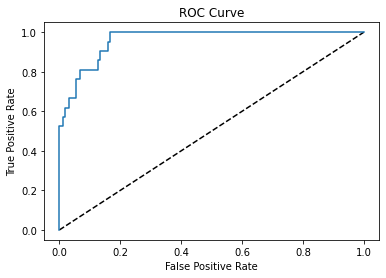

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.07120074 0.01718008 0.00115143 0.00090596 0.00143863 0.06997569
 0.0003094  0.00076057 0.11817246 0.00667834]


In [87]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_Grid_gnb = Grid_gnb_best_model.predict_proba(x_test_fold_v2)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold_v2, y_pred_prob_Grid_gnb)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_Grid_gnb[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_Grid_gnb[0:10]))

In [88]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold_v2, y_pred_prob_Grid_gnb)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(estimator = Grid_gnb_best_model ,X = features_array_v2, y = target_array_v2, cv = 108, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# Report the mean and standard deviation
print('The mean: {}'.format(cv_auc.mean()))
print('The std: {}'.format(cv_auc.std()))

AUC: 0.9608956165247556
AUC scores computed using 108-fold cross-validation: [0.71428571 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.85714286 1.         1.         1.         1.         1.
 0.85714286 1.         1.         1.         1.         1.
 1.         1.         1.         0.85714286 1.         1.
 1.         1.         1.         1.         1.         1.
 0.85714286 0.85714286 0.71428571 0.71428571 1.         0.71428571
 1.         1.         1.         0.14285714 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 1.         1.         1.         1.
 0.85714286 1.         1.     

# Conclusion Part 1 

In [89]:
classifiers = np.array(["K-Nearest Neighbors(GridSearchCV)","K-Nearest Neighbors(Iteration)","Logistic Regression(GridSearchCV)","Decision Trees(RandomizedSearchCV)","Decision Trees(GridSearchCV)","Non-linear Support Vector Machines(GridSearchCV)","Linear Support Vector Machines(GridSearchCV)","Gaussian Naïve Bayes(GridSearchCV)"])
Precision = np.array([0.83,0.83,0.86,0.79,0.79,0.86,0.90,0.63])
Recall = np.array([0.90,0.90,0.86,0.90,0.90,0.90,0.86,0.81])
f1_score = np.array([0.86,0.86,0.86,0.84,0.84,0.88,0.88,0.71])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,K-Nearest Neighbors(GridSearchCV),0.83,0.90,0.86
1,K-Nearest Neighbors(Iteration),0.83,0.90,0.86
2,Logistic Regression(GridSearchCV),0.86,0.86,0.86
3,Decision Trees(RandomizedSearchCV),0.79,0.90,0.84
4,Decision Trees(GridSearchCV),0.79,0.90,0.84
5,Non-linear Support Vector Machines(GridSearchCV),0.86,0.90,0.88
6,Linear Support Vector Machines(GridSearchCV),0.90,0.86,0.88
7,Gaussian Naïve Bayes(GridSearchCV),0.63,0.81,0.71


- Usually, the "class of interest" is called the positive class. As we are trying to detect death of a patient, this makes death of a patient in our case the positive class. 
- **Percision** (positive predictive value) is used when we don't want to overpredict positive values. In our case this is the number of correctly labeled death of a patient divided by the total number of patients classified as dead. 
- High percision means that our classifier had a low false positive rate, that is, not many recoverd patients were predicted as being dead. 
- **Recall** (sensitivity, hit rate or true positive rate) is about finding all positive values and is used when we can't afford to miss any positive values. 
- High recall means that our classifier predicted most positive or dead patients correctly. 


Since we are more considerate to the death of a patient over his/her recovery; we decided to focaus on increasing the recall of the positive class (1). Also we considerd having a good value for the Precision of postive class (1).


In the table above we notice that:
- Maximum Precision is 90%.
- Maximum recall is 90%.
- Maximum f1-score is 88%.
- Most of the classifiers has 90% recall.
- Non-linear Support Vector Machines(GridSearchCV) has the best Precision and Recall values combined.

# Ensemble Learning Methods

**Ensemble methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

## Voting Classifier

**Voting Classifier** is an ensemble of models that are fit to the same training set using different algorithms, where If the voting is ‘hard’, uses predicted class labels for majority rule voting. Else if the voting is ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

- Train dierent models on the same dataset.
- Let each model make its predictions.
- Meta-model:aggregates predictions of individual models.
- Final prediction: more robust and less prone to errors.
- Best results: models are skillful in dierent ways.

<img src="https://www.ryangineer.com/assets/img-ensemble-learning.png"/>

In [90]:
# # Define the list classifiers
# classifiers = [("K-Nearest Neighbors(GridSearchCV)", Grid_knn_best_model),("K-Nearest Neighbors(Iteration)", knn),("Logistic Regression(GridSearchCV)", Grid_logreg_best_model),("Decision Trees(RandomizedSearchCV)", Randomized_dt_best_model),("Decision Trees(GridSearchCV)", Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)", Grid_NonLinear_svm_best_model),("Linear Support Vector Machines(GridSearchCV)", Grid_Linear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)", Grid_gnb_best_model)]

# Define the list classifiers
classifiers = [("K-Nearest Neighbors(GridSearchCV)", Grid_knn_best_model),("Logistic Regression(GridSearchCV)", Grid_logreg_best_model),("Decision Trees(GridSearchCV)", Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)", Grid_NonLinear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)", Grid_gnb_best_model)]


# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(x_temp_fold, y_temp_fold)    
   
    # Predict y_pred
    y_pred_clfs = clf.predict(x_test_fold)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_fold, y_pred_clfs) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

K-Nearest Neighbors(GridSearchCV) : 0.965
Logistic Regression(GridSearchCV) : 0.965
Decision Trees(GridSearchCV) : 0.959
Non-linear Support Vector Machines(GridSearchCV) : 0.971
Gaussian Naïve Bayes(GridSearchCV) : 0.901


In [91]:
# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers,voting='soft', n_jobs = -1)

# print(vc.get_params())

# Fit vc to the training set
vc.fit(x_temp_fold, y_temp_fold)   

# Evaluate the test set predictions
y_pred_vc = vc.predict(x_test_fold)

# Calculate accuracy score
accuracy = accuracy_score(y_test_fold, y_pred_vc)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy))

Voting Classifier accuracy: 0.977


In [92]:
# Generate the confusion matrix and classification report
cm_vc = confusion_matrix(y_test_fold, y_pred_vc)
cr_vc = classification_report(y_test_fold, y_pred_vc)

print(cm_vc)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_vc[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_vc[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_vc[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_vc[1, 1]))

print(cr_vc)

# Print out count of binary predictions
print(pd.Series(y_pred_vc).value_counts())

[[148   3]
 [  1  20]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 1
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 20
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       151
           1       0.87      0.95      0.91        21

    accuracy                           0.98       172
   macro avg       0.93      0.97      0.95       172
weighted avg       0.98      0.98      0.98       172

0    149
1     23
dtype: int64


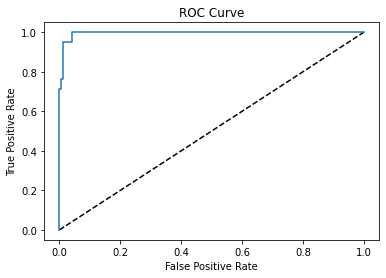

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.06251177 0.05294245 0.02329489 0.00767519 0.00804687 0.45335429
 0.00755131 0.0072226  0.13631094 0.02464509]


In [93]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_vc = vc.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_vc)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_vc[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_vc[0:10]))

In [94]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_vc)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = vc ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9952696310312205


## Bootstrap aggregation or Bagging using out of bag evaluation

**Bagging** is an ensemble formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data. In fact, bagging stands for bootstrap aggregation. its name refers to the fact that it uses a techniqe known as the bootstrap. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble. In classification the final prediction is obtained by majority voting.

- Train different subests of the same training set with same algorithm in N models.
- Base estimator: Decision Tree, Logistic Regression, Neural Net . . .
- Each estimator is trained on a distinct bootstrap sample of the training set.
- Estimators use all available features for training & prediction.
- Reduces variance of individual models in the ensemble.

**Bootstrap**

<img src="https://goodboychan.github.io/images/copied_from_nb/image/bootstrap.png"/>

**Bagging:Training**

<img src="https://goodboychan.github.io/images/copied_from_nb/image/bs_training.png"/>

**Bagging:Prediction**

<img src="https://www.ryangineer.com/assets/img-bagging.png"/>

**Bagging**
- some instances may be sampled several times for one model.
- other instances may not be sampled at all.

**OutOfBag(OOB)instances**
- On average,for each model,63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.

**OOBEvaluation**

<img src="https://pbs.twimg.com/media/DkawF7bW4AIfdtP?format=jpg&name=small" />

**Parameters Used In This Part**
- **base_estimator** (object, default=None):\
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.
- **n_estimators** (int, default=10):\
The number of base estimators in the ensemble.
- **max_samples** (int or float, default=1.0):\
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).
  - If int, then draw max_samples samples.
  - If float, then draw max_samples * X.shape[0] samples.
- **max_features** (int or float, default=1.0):\
The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).
  - If int, then draw max_features features.
  - If float, then draw max_features * X.shape[1] features.  
- **oob_score** (bool, default=False):\
Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.
- **random_state** (int, RandomState instance or None, default=None):\
Controls the random resampling of the original dataset (sample wise and feature wise). If the base estimator accepts a random_state attribute, a different seed is generated for each instance in the ensemble. Pass an int for reproducible output across multiple function calls.

### K-Nearest Neighbors(GridSearchCV)

In [95]:
# Instantiate bag_Grid_knn_best_model
bag_Grid_knn_best_model = BaggingClassifier(base_estimator = Grid_knn_best_model, n_estimators = 50,oob_score=True,random_state=17, max_samples=1.0, max_features=1.0)

# Fit bag_Grid_knn_best_model to the training set 
bag_Grid_knn_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_knn_best_model = bag_Grid_knn_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_knn_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_knn_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.959, OOB accuracy: 0.923


In [96]:
# Generate the confusion matrix and classification report
cm_bag_Grid_knn_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_knn_best_model)
cr_bag_Grid_knn_best_model = classification_report(y_test_fold, y_pred_bag_Grid_knn_best_model)

print(cm_bag_Grid_knn_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_knn_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_knn_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_knn_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_knn_best_model[1, 1]))

print(cr_bag_Grid_knn_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_knn_best_model).value_counts())

[[146   5]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 146
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 5
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.79      0.90      0.84        21

    accuracy                           0.96       172
   macro avg       0.89      0.94      0.91       172
weighted avg       0.96      0.96      0.96       172

0    148
1     24
dtype: int64


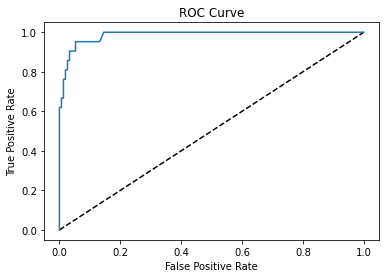

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.07916667 0.0725     0.05333333 0.01       0.00083333 0.56583333
 0.02583333 0.         0.0675     0.05416667]


In [97]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_bag_Grid_knn_best_model = bag_Grid_knn_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_knn_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_knn_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_knn_best_model[0:10]))

In [98]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_knn_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_knn_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9854935351624093


### K-Nearest Neighbors(Iteration)

In [99]:
# Instantiate bc_knn
bag_knn = BaggingClassifier(base_estimator = knn, n_estimators = 50,oob_score=True,random_state=17, max_samples=1.0, max_features=1.0)

# Fit bc to the training set 
bag_knn.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_knn = bag_knn.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_knn)

# Evaluate OOB accuracy
acc_oob = bag_knn.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.959, OOB accuracy: 0.923


In [100]:
# Generate the confusion matrix and classification report
cm_bag_knn = confusion_matrix(y_test_fold, y_pred_bag_knn)
cr_bag_knn = classification_report(y_test_fold, y_pred_bag_knn)

print(cm_bag_knn)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_knn[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_knn[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_knn[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_knn[1, 1]))

print(cr_bag_knn)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_knn).value_counts())

[[146   5]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 146
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 5
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.79      0.90      0.84        21

    accuracy                           0.96       172
   macro avg       0.89      0.94      0.91       172
weighted avg       0.96      0.96      0.96       172

0    148
1     24
dtype: int64


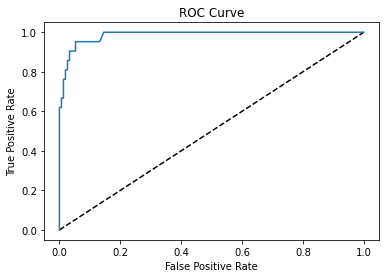

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.07916667 0.0725     0.05333333 0.01       0.00083333 0.56583333
 0.02583333 0.         0.0675     0.05416667]


In [101]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_bag_knn = bag_knn.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_knn)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_knn[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_knn[0:10]))

In [102]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_knn)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_knn ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9854935351624093


### Logistic Regression(GridSearchCV)

In [103]:
# Instantiate bc_Grid_logreg_best_model
bag_Grid_logreg_best_model = BaggingClassifier(base_estimator = Grid_logreg_best_model, n_estimators = 50,oob_score=True,random_state=17, max_samples=1.0, max_features=0.90)

# Fit bc to the training set 
bag_Grid_logreg_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_logreg_best_model = bag_Grid_logreg_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_logreg_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_logreg_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.977, OOB accuracy: 0.958


In [104]:
# Generate the confusion matrix and classification report
cm_bag_Grid_logreg_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_logreg_best_model)
cr_bag_Grid_logreg_best_model = classification_report(y_test_fold, y_pred_bag_Grid_logreg_best_model)

print(cm_bag_Grid_logreg_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_logreg_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_logreg_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_logreg_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_logreg_best_model[1, 1]))

print(cr_bag_Grid_logreg_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_logreg_best_model).value_counts())

[[150   1]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 150
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 1
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.95      0.86      0.90        21

    accuracy                           0.98       172
   macro avg       0.96      0.93      0.94       172
weighted avg       0.98      0.98      0.98       172

0    153
1     19
dtype: int64


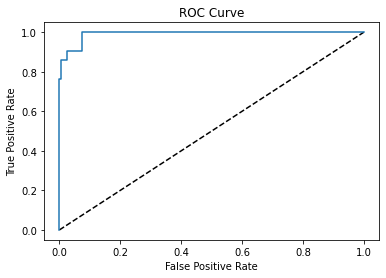

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.15440923 0.01932826 0.00158676 0.00070715 0.00150361 0.21832501
 0.00841445 0.00610382 0.36084669 0.01234585]


In [105]:
# Compute predicted probabilities: y_pred_prob_bag_Grid_logreg_best_model
y_pred_prob_bag_Grid_logreg_best_model = bag_Grid_logreg_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_logreg_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_logreg_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_logreg_best_model[0:10]))

In [106]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_logreg_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_logreg_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9911699779249448


### Decision Trees(RandomizedSearchCV)

In [107]:
# Instantiate bc_Randomized_dt_best_model
bag_Randomized_dt_best_model = BaggingClassifier(base_estimator = Randomized_dt_best_model, n_estimators = 300,oob_score=True,random_state=69, max_samples=1.0, max_features=1.0)

# Fit bc to the training set 
bag_Randomized_dt_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Randomized_dt_best_model = bag_Randomized_dt_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Randomized_dt_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Randomized_dt_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.977, OOB accuracy: 0.900


In [108]:
# Generate the confusion matrix and classification report
cm_bag_Randomized_dt_best_model = confusion_matrix(y_test_fold, y_pred_bag_Randomized_dt_best_model)
cr_bag_Randomized_dt_best_model = classification_report(y_test_fold, y_pred_bag_Randomized_dt_best_model)

print(cm_bag_Randomized_dt_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Randomized_dt_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Randomized_dt_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Randomized_dt_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Randomized_dt_best_model[1, 1]))

print(cr_bag_Randomized_dt_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Randomized_dt_best_model).value_counts())

[[149   2]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.90      0.90      0.90        21

    accuracy                           0.98       172
   macro avg       0.95      0.95      0.95       172
weighted avg       0.98      0.98      0.98       172

0    151
1     21
dtype: int64


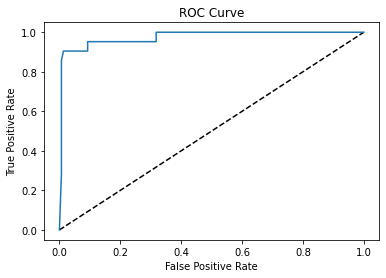

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.05051551 0.03284482 0.03148593 0.02831554 0.02831554 0.45949682
 0.0270419  0.0270419  0.02642506 0.03296199]


In [109]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_bag_Randomized_dt_best_model = bag_Randomized_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Randomized_dt_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Randomized_dt_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Randomized_dt_best_model[0:10]))

In [110]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Randomized_dt_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9752444023967203


### Decision Trees(GridSearchCV)

In [111]:
# Instantiate bc_Grid_dt_best_model
bag_Grid_dt_best_model = BaggingClassifier(base_estimator = Grid_dt_best_model, n_estimators = 300,oob_score=True,random_state=69,max_samples=1.0, max_features=1.0)

# Fit bc to the training set 
bag_Grid_dt_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_dt_best_model = bag_Grid_dt_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_dt_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_dt_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.977, OOB accuracy: 0.900


In [112]:
# Generate the confusion matrix and classification report
cm_bag_Grid_dt_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_dt_best_model)
cr_bag_Grid_dt_best_model = classification_report(y_test_fold, y_pred_bag_Grid_dt_best_model)

print(cm_bag_Grid_dt_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_dt_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_dt_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_dt_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_dt_best_model[1, 1]))

print(cr_bag_Grid_dt_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_dt_best_model).value_counts())

[[149   2]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.90      0.90      0.90        21

    accuracy                           0.98       172
   macro avg       0.95      0.95      0.95       172
weighted avg       0.98      0.98      0.98       172

0    151
1     21
dtype: int64


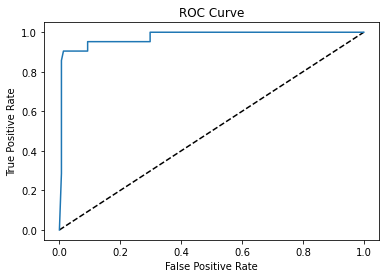

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.05040337 0.03279602 0.03136013 0.02818974 0.02818974 0.45949682
 0.02700229 0.02700229 0.02637669 0.03284228]


In [113]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_bag_Grid_dt_best_model = bag_Grid_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_dt_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_dt_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_dt_best_model[0:10]))

In [114]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_dt_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9761904761904762


### Non-linear Support Vector Machines(GridSearchCV)

In [115]:
# Instantiate bc_Grid_NonLinear_svm_best_model
bag_Grid_NonLinear_svm_best_model = BaggingClassifier(base_estimator = Grid_NonLinear_svm_best_model, n_estimators = 100,oob_score=True,random_state=69,max_samples=1.0, max_features=0.90)

# Fit bc to the training set 
bag_Grid_NonLinear_svm_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_NonLinear_svm_best_model = bag_Grid_NonLinear_svm_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_NonLinear_svm_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_NonLinear_svm_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.977, OOB accuracy: 0.944


In [116]:
# Generate the confusion matrix and classification report
cm_bag_Grid_NonLinear_svm_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_NonLinear_svm_best_model)
cr_bag_Grid_NonLinear_svm_best_model = classification_report(y_test_fold, y_pred_bag_Grid_NonLinear_svm_best_model)

print(cm_bag_Grid_NonLinear_svm_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_NonLinear_svm_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_NonLinear_svm_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_NonLinear_svm_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_NonLinear_svm_best_model[1, 1]))

print(cr_bag_Grid_NonLinear_svm_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_NonLinear_svm_best_model).value_counts())

[[150   1]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 150
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 1
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.95      0.86      0.90        21

    accuracy                           0.98       172
   macro avg       0.96      0.93      0.94       172
weighted avg       0.98      0.98      0.98       172

0    153
1     19
dtype: int64


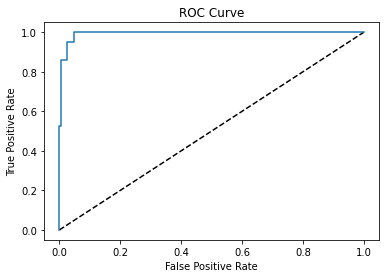

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.05023151 0.07815438 0.0451069  0.04765744 0.05050384 0.46698527
 0.04655683 0.05028111 0.07445199 0.05270661]


In [117]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_bag_Grid_NonLinear_svm_best_model = bag_Grid_NonLinear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_NonLinear_svm_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_NonLinear_svm_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_NonLinear_svm_best_model[0:10]))

In [118]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_NonLinear_svm_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_NonLinear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9930621255124567


### Linear Support Vector Machines(GridSearchCV)

In [119]:
# Instantiate bc_Grid_Linear_svm_best_model
bag_Grid_Linear_svm_best_model = BaggingClassifier(base_estimator = Grid_Linear_svm_best_model, n_estimators = 100,oob_score=True,random_state=17,max_samples=1.0, max_features=1.0)

# Fit bc to the training set 
bag_Grid_Linear_svm_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_Linear_svm_best_model = bag_Grid_Linear_svm_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_Linear_svm_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_Linear_svm_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.977, OOB accuracy: 0.961


In [120]:
# Generate the confusion matrix and classification report
cm_bag_Grid_Linear_svm_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_Linear_svm_best_model)
cr_bag_Grid_Linear_svm_best_model = classification_report(y_test_fold, y_pred_bag_Grid_Linear_svm_best_model)

print(cm_bag_Grid_NonLinear_svm_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_Linear_svm_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_Linear_svm_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_Linear_svm_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_Linear_svm_best_model[1, 1]))

print(cr_bag_Grid_Linear_svm_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_Linear_svm_best_model).value_counts())

[[150   1]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 150
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 1
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.95      0.86      0.90        21

    accuracy                           0.98       172
   macro avg       0.96      0.93      0.94       172
weighted avg       0.98      0.98      0.98       172

0    153
1     19
dtype: int64


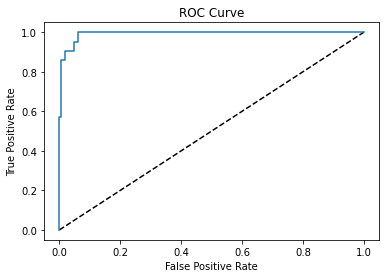

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [1.79976411e-01 1.19660930e-02 9.79271143e-04 9.76716105e-04
 1.39576300e-03 2.58736907e-01 1.29305558e-04 1.56288685e-04
 3.37814077e-01 4.16044128e-03]


In [121]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_bag_Grid_Linear_svm_best_model = bag_Grid_Linear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_Linear_svm_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_Linear_svm_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_Linear_svm_best_model[0:10]))

In [122]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_Linear_svm_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_Linear_svm_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9921160517187008


### Gaussian Naïve Bayes(GridSearchCV)

In [123]:
# Instantiate bc_Grid_gnb_best_model
bag_Grid_gnb_best_model = BaggingClassifier(base_estimator = Grid_gnb_best_model, n_estimators = 100,oob_score=True,random_state=7,max_samples=0.90, max_features=0.60)

# Fit bc to the training set 
bag_Grid_gnb_best_model.fit(x_temp_fold, y_temp_fold)

# Predict test set labels
y_pred_bag_Grid_gnb_best_model = bag_Grid_gnb_best_model.predict(x_test_fold)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_fold, y_pred_bag_Grid_gnb_best_model)

# Evaluate OOB accuracy
acc_oob = bag_Grid_gnb_best_model.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.936, OOB accuracy: 0.891


In [124]:
# Generate the confusion matrix and classification report
cm_bag_Grid_gnb_best_model = confusion_matrix(y_test_fold, y_pred_bag_Grid_gnb_best_model)
cr_bag_Grid_gnb_best_model = classification_report(y_test_fold, y_pred_bag_Grid_gnb_best_model)

print(cm_bag_Grid_gnb_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_bag_Grid_gnb_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_bag_Grid_gnb_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_bag_Grid_gnb_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_bag_Grid_gnb_best_model[1, 1]))

print(cr_bag_Grid_gnb_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_bag_Grid_gnb_best_model).value_counts())

[[142   9]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 142
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 9
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       151
           1       0.68      0.90      0.78        21

    accuracy                           0.94       172
   macro avg       0.83      0.92      0.87       172
weighted avg       0.95      0.94      0.94       172

0    144
1     28
dtype: int64


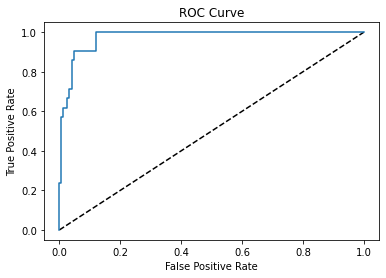

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.4005772  0.39942388 0.16166557 0.13154617 0.15188915 0.46493509
 0.32160133 0.34130836 0.38456024 0.26416202]


In [125]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_bag_Grid_gnb_best_model = bag_Grid_gnb_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_bag_Grid_gnb_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_bag_Grid_gnb_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_bag_Grid_gnb_best_model[0:10]))

In [126]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_bag_Grid_gnb_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9750867234310943


## Random Forests

**Bagging**
- Base estimator: Decision Tree, Logistic Regression, Neural Network, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

**Further Diversity with Random Forest**
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement. where d<total number of features

**RandomForests:Training**

<img src="https://www.ryangineer.com/assets/img-random-forests.png" />

**RandomForests:Prediction**

<img src="https://goodboychan.github.io/images/copied_from_nb/image/rf_prediction.png" />

- Feature importance
  - Tree based methods: enable measuring the importance of each feature in prediction

**Parameters Used In This Part**
- **n_estimators** (int, default=100):\
The number of trees in the forest.
- **random_state** (int, RandomState instance or None, default=None):\
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

In [128]:
# # Setup the parameters and distributions to sample from: params_dt
# params_dt = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
#              "min_samples_leaf": [0.04, 0.06, 0.08],
#              "max_features": [0.2, 0.4,0.6, 0.8],
#              "criterion": ["gini", "entropy"],
#             "n_estimators":[100,200,300,400,500,600,700,800]}


# Instantiate rf
rf = RandomForestClassifier(n_estimators = 100, random_state=7)

# # Instantiate the GridSearchCV object: Grid_dt
# Grid_rf = GridSearchCV(estimator = rf , param_grid = params_dt , scoring = 'roc_auc' , cv = 20 , n_jobs = -1)      
            
# Fit rf to the training set    
rf.fit(x_temp_fold, y_temp_fold)

# # Print the optimal parameters and best score
# print("Tuned Decision Tree Parameter: {}".format(Grid_rf.best_params_))
# print("Tuned Decision Tree Accuracy: {}".format(Grid_rf.best_score_))

# # Report the test accuracy using these best parameters
# print("Test accuracy of best grid search hypers:", Grid_rf.score(x_val_fold,y_val_fold))

# Predict the test set labels
y_pred_rf = rf.predict(x_test_fold)

# Evaluate the test set RMSE
rmse_rf_test = MSE(y_test_fold,y_pred_rf)**(1/2)

# Evaluate the test set RMSE
rmse_Randomized_dt_test = MSE(y_test_fold,y_pred_Randomized_dt)**(1/2)

# Evaluate the test set RMSE
rmse_Grid_dt_test = MSE(y_test_fold,y_pred_Grid_dt)**(1/2)

# Print rmse_rf_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_rf_test))

# Print rmse_Randomized_dt_test
print('Test set RMSE of Randomized_dt: {:.2f}'.format(rmse_Randomized_dt_test))

# Print rmse_Grid_dt_test
print('Test set RMSE of Grid_dt: {:.2f}'.format(rmse_Grid_dt_test))

Test set RMSE of rf: 0.13
Test set RMSE of Randomized_dt: 0.20
Test set RMSE of Grid_dt: 0.20


In [129]:
# Generate the confusion matrix and classification report
cm_rf = confusion_matrix(y_test_fold, y_pred_rf)
cr_rf = classification_report(y_test_fold, y_pred_rf)

print(cm_bag_Grid_gnb_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_rf[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_rf[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_rf[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_rf[1, 1]))

print(cr_rf)

# Print out count of binary predictions
print(pd.Series(y_pred_rf).value_counts())

[[142   9]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 1
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 20
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.91      0.95      0.93        21

    accuracy                           0.98       172
   macro avg       0.95      0.97      0.96       172
weighted avg       0.98      0.98      0.98       172

0    150
1     22
dtype: int64


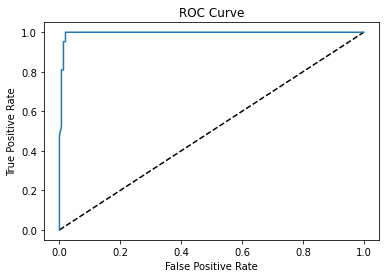

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.01 0.02 0.01 0.   0.   0.25 0.   0.06 0.23 0.  ]


In [130]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_rf = rf.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_rf[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_rf[0:10]))

In [131]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_rf)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9951119520655944


In [132]:
# features_array_df = pd.DataFrame(data = features_array)

# # Create a pd.Series of features importances
# importances = pd.Series(data=rf.feature_importances_,
#                         index= features_array_df.columns)

# # Sort importances
# importances_sorted = importances.sort_values()

# # Draw a horizontal barplot of importances_sorted
# importances_sorted.plot(kind='barh', color='lightgreen',figsize=(25,25))
# plt.title('Features Importances')
# plt.show()

## Boosting

- **Boosting:** Ensemble method combining several weak learners to form a strong learner.
  - Weak learner: Model doing slightly better than random guessing
    - E.g., Dicision stump (CART whose maximum depth is 1)
  - Train an ensemble of predictors sequentially.
  - Each predictor tries to correct its predecessor
  - Most popular boosting methods:
    - AdaBoost
    - Gradient Boosting

### Adaboost

- Stands for Adaptive Boosting
- Each predictor pays more attention to the instances wrongly predicted by its predecessors.
- Achieved by constantly changing the weights of training instances.
- Each predictor is assigned a coefficient α.
- α depends on the predictor's training error.
- Leanring Rate: 0 < η ≤ 1

**AdaBoost: Training**

<img src="https://www.ryangineer.com/assets/img-adaboost.png"/>

**All the base learners supported by AdaBoostClassifier:**
    
- AdaBoostClassifier
- BernoulliNB
- DecisionTreeClassifier
- ExtraTreeClassifier
- ExtraTreesClassifier
- MultinomialNB
- NuSVC
- Perceptron
- RandomForestClassifier
- RidgeClassifierCV
- SGDClassifier
- SVC

**Parameters Used In This Part**
- **base_estimator** (object, default=None):\
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
- **learning_rate** (float, default=1.0):\
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.
- **n_estimators** (int, default=50):\
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
- **random_state** (int, RandomState instance or None, default=None):\
Controls the random seed given at each base_estimator at each boosting iteration. Thus, it is only used when base_estimator exposes a random_state. Pass an int for reproducible output across multiple function calls.

#### Random Forests

In [133]:
# Instantiate ada
ada_rf = AdaBoostClassifier(base_estimator = rf, learning_rate = 1, n_estimators = 100, random_state=1)

# Fit ada to the training set
ada_rf.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_rf = ada_rf.predict(x_test_fold)

In [134]:
# Generate the confusion matrix and classification report
cm_ada_rf = confusion_matrix(y_test_fold, y_pred_ada_rf)
cr_ada_rf = classification_report(y_test_fold, y_pred_ada_rf)

print(cm_ada_rf)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_rf[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_rf[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_rf[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_rf[1, 1]))

print(cr_ada_rf)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_rf).value_counts())

[[148   3]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       151
           1       0.86      0.90      0.88        21

    accuracy                           0.97       172
   macro avg       0.93      0.94      0.93       172
weighted avg       0.97      0.97      0.97       172

0    150
1     22
dtype: int64


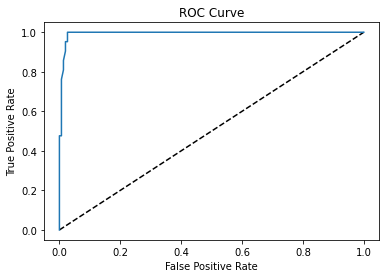

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [6.00000000e-02 2.00000000e-02 2.00000000e-02 2.22044605e-16
 2.22044605e-16 3.50000000e-01 1.00000000e-02 3.00000000e-02
 2.30000000e-01 2.22044605e-16]


In [135]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_rf = ada_rf.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_rf[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_rf[0:10]))

In [136]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_rf)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = ada_rf ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9940081993062125


#### Decision Trees(RandomizedSearchCV)

In [137]:
# Instantiate ada
ada_Randomized_dt_best_model = AdaBoostClassifier(base_estimator = Randomized_dt_best_model, learning_rate = 1, n_estimators = 80, random_state=7)

# Fit ada to the training set
ada_Randomized_dt_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Randomized_dt_best_model = ada_Randomized_dt_best_model.predict(x_test_fold)

In [138]:
# Generate the confusion matrix and classification report
cm_ada_Randomized_dt_best_model = confusion_matrix(y_test_fold, y_pred_ada_Randomized_dt_best_model)
cr_ada_Randomized_dt_best_model = classification_report(y_test_fold, y_pred_ada_Randomized_dt_best_model)

print(cm_ada_Randomized_dt_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Randomized_dt_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Randomized_dt_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Randomized_dt_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Randomized_dt_best_model[1, 1]))

print(cr_ada_Randomized_dt_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Randomized_dt_best_model).value_counts())

[[149   2]
 [  1  20]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 1
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 20
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.91      0.95      0.93        21

    accuracy                           0.98       172
   macro avg       0.95      0.97      0.96       172
weighted avg       0.98      0.98      0.98       172

0    150
1     22
dtype: int64


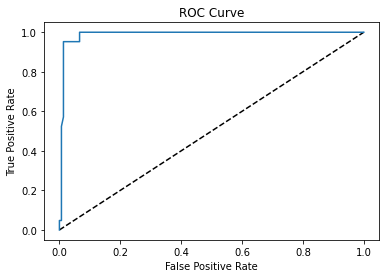

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.33106023 0.33083072 0.00197551 0.0014572  0.00265505 0.45661767
 0.00444443 0.00283257 0.37075156 0.00072867]


In [139]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Randomized_dt_best_model = ada_Randomized_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Randomized_dt_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Randomized_dt_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Randomized_dt_best_model[0:10]))

In [140]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Randomized_dt_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = ada_Randomized_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.988174077578051


#### Decision Trees(GridSearchCV)

In [141]:
# Instantiate ada
ada_Grid_dt_best_model = AdaBoostClassifier(base_estimator = Grid_dt_best_model, learning_rate = 1, n_estimators = 600, random_state=7)

# Fit ada to the training set
ada_Grid_dt_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Grid_dt_best_model = ada_Grid_dt_best_model.predict(x_test_fold)

In [142]:
# Generate the confusion matrix and classification report
cm_ada_Grid_dt_best_model = confusion_matrix(y_test_fold, y_pred_ada_Grid_dt_best_model)
cr_ada_Grid_dt_best_model = classification_report(y_test_fold, y_pred_ada_Grid_dt_best_model)

print(cm_ada_Grid_dt_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_dt_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_dt_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_dt_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_dt_best_model[1, 1]))

print(cr_ada_Grid_dt_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Grid_dt_best_model).value_counts())

[[148   3]
 [  0  21]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 0
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 21
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       151
           1       0.88      1.00      0.93        21

    accuracy                           0.98       172
   macro avg       0.94      0.99      0.96       172
weighted avg       0.98      0.98      0.98       172

0    148
1     24
dtype: int64


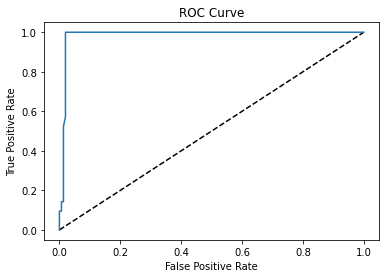

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.47451851 0.37876704 0.11325531 0.10580497 0.10765031 0.49125452
 0.11273775 0.0944278  0.48275043 0.21352855]


In [143]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Grid_dt_best_model = ada_Grid_dt_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Grid_dt_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_dt_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_dt_best_model[0:10]))

In [144]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Grid_dt_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = ada_Grid_dt_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9853358561967834


#### Gaussian Naïve Bayes(GridSearchCV)

In [145]:
# Instantiate ada
ada_Grid_gnb_best_model = AdaBoostClassifier(base_estimator = Grid_gnb_best_model, learning_rate = 0.01, n_estimators = 200, random_state=7)

# Fit ada to the training set
ada_Grid_gnb_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Grid_gnb_best_model = ada_Grid_gnb_best_model.predict(x_test_fold)

In [146]:
# Generate the confusion matrix and classification report
cm_ada = confusion_matrix(y_test_fold, y_pred_ada_Grid_gnb_best_model)
cr_ada = classification_report(y_test_fold, y_pred_ada_Grid_gnb_best_model)

print(cm_ada)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada[1, 1]))

print(cr_ada)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Grid_gnb_best_model).value_counts())

[[150   1]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 150
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 1
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.95      0.90      0.93        21

    accuracy                           0.98       172
   macro avg       0.97      0.95      0.96       172
weighted avg       0.98      0.98      0.98       172

0    152
1     20
dtype: int64


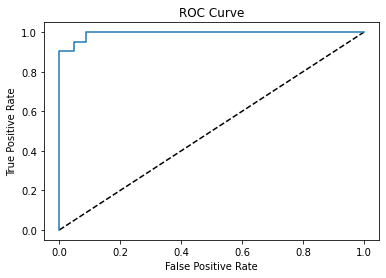

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.25917799 0.15501955 0.04079637 0.03297325 0.04392496 0.26480744
 0.04788609 0.04801695 0.36940764 0.09843045]


In [147]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Grid_gnb_best_model = ada_Grid_gnb_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Grid_gnb_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_gnb_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_gnb_best_model[0:10]))

In [148]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Grid_gnb_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = ada_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))]

AUC: 0.9936928413749606


#### Logistic Regression(GridSearchCV)

In [149]:
# Instantiate ada
ada_Grid_logreg_best_model = AdaBoostClassifier(base_estimator = Grid_logreg_best_model, learning_rate = 1, n_estimators = 400, random_state = 17)

# Fit ada to the training set
ada_Grid_logreg_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Grid_logreg_best_model = ada_Grid_logreg_best_model.predict(x_test_fold)

In [150]:
# Generate the confusion matrix and classification report
cm_ada_Grid_logreg_best_model = confusion_matrix(y_test_fold, y_pred_ada_Grid_logreg_best_model)
cr_ada_Grid_logreg_best_model = classification_report(y_test_fold, y_pred_ada_Grid_logreg_best_model)

print(cm_ada_Grid_logreg_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_logreg_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_logreg_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_logreg_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_logreg_best_model[1, 1]))

print(cr_ada_Grid_logreg_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Grid_logreg_best_model).value_counts())

[[145   6]
 [  3  18]]
The number of true negative is (Predict/Actual are both 0): 145
The number of false negative is (Predict 0,Actual 1): 3
The number of false positive is (Predict 1,Actual 0): 6
The number of true positives is (Predict/Actual are both 1): 18
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       151
           1       0.75      0.86      0.80        21

    accuracy                           0.95       172
   macro avg       0.86      0.91      0.88       172
weighted avg       0.95      0.95      0.95       172

0    148
1     24
dtype: int64


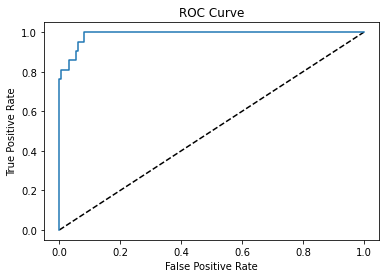

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.49331515 0.48141775 0.46612703 0.46602431 0.46832187 0.49337838
 0.45462339 0.45915691 0.49878631 0.47528746]


In [151]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Grid_logreg_best_model = ada_Grid_logreg_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Grid_logreg_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_logreg_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_logreg_best_model[0:10]))

In [152]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Grid_logreg_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))]

AUC: 0.988962472406181


#### Non-linear Support Vector Machines(GridSearchCV)

In [153]:
# Instantiate ada
ada_Grid_NonLinear_svm_best_model = AdaBoostClassifier(base_estimator = Grid_NonLinear_svm_best_model, learning_rate = 0.001, n_estimators = 800, random_state=7)

# Fit ada to the training set
ada_Grid_NonLinear_svm_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Grid_NonLinear_svm_best_model = ada_Grid_NonLinear_svm_best_model.predict(x_test_fold)

In [154]:
# Generate the confusion matrix and classification report
cm_ada_Grid_NonLinear_svm_best_model = confusion_matrix(y_test_fold, y_pred_ada_Grid_NonLinear_svm_best_model)
cr_ada_Grid_NonLinear_svm_best_model = classification_report(y_test_fold, y_pred_ada_Grid_NonLinear_svm_best_model)

print(cm_ada_Grid_NonLinear_svm_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_NonLinear_svm_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_NonLinear_svm_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_NonLinear_svm_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_NonLinear_svm_best_model[1, 1]))

print(cr_ada_Grid_NonLinear_svm_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Grid_NonLinear_svm_best_model).value_counts())

[[148   3]
 [  4  17]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 4
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 17
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       151
           1       0.85      0.81      0.83        21

    accuracy                           0.96       172
   macro avg       0.91      0.89      0.90       172
weighted avg       0.96      0.96      0.96       172

0    152
1     20
dtype: int64


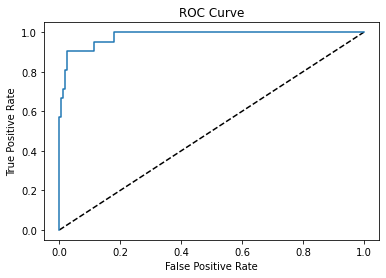

The first 10 predicted values are: [0 0 0 0 0 1 0 0 0 0]
The first 10 predicted probabilities are: [0.07397514 0.06053572 0.05922961 0.05967928 0.0598071  0.53520783
 0.06033635 0.05935533 0.06032772 0.05886184]


In [155]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Grid_NonLinear_svm_best_model = ada_Grid_NonLinear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Grid_NonLinear_svm_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_NonLinear_svm_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_NonLinear_svm_best_model[0:10]))

In [156]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Grid_NonLinear_svm_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))]

AUC: 0.9804478082623779


#### Linear Support Vector Machines(GridSearchCV)

In [157]:
# Instantiate ada
ada_Grid_Linear_svm_best_model = AdaBoostClassifier(base_estimator = Grid_Linear_svm_best_model, learning_rate = 0.001, n_estimators = 100, random_state=7)

# Fit ada to the training set
ada_Grid_Linear_svm_best_model.fit(x_temp_fold,y_temp_fold)

# Predict the test set labels
y_pred_ada_Grid_Linear_svm_best_model = ada_Grid_Linear_svm_best_model.predict(x_test_fold)

In [158]:
# Generate the confusion matrix and classification report
cm_ada_Grid_Linear_svm_best_model = confusion_matrix(y_test_fold, y_pred_ada_Grid_Linear_svm_best_model)
cr_ada_Grid_Linear_svm_best_model = classification_report(y_test_fold, y_pred_ada_Grid_Linear_svm_best_model)

print(cm_ada_Grid_Linear_svm_best_model)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_ada_Grid_Linear_svm_best_model[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_ada_Grid_Linear_svm_best_model[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_ada_Grid_Linear_svm_best_model[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_ada_Grid_Linear_svm_best_model[1, 1]))

print(cr_ada_Grid_Linear_svm_best_model)

# Print out count of binary predictions
print(pd.Series(y_pred_ada_Grid_Linear_svm_best_model).value_counts())

[[149   2]
 [  6  15]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 6
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 15
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.88      0.71      0.79        21

    accuracy                           0.95       172
   macro avg       0.92      0.85      0.88       172
weighted avg       0.95      0.95      0.95       172

0    155
1     17
dtype: int64


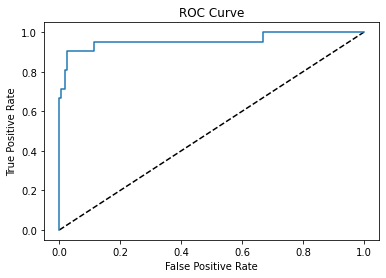

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [1.32903789e-01 1.85448656e-02 6.51040992e-03 8.72181379e-03
 1.01553630e-02 4.72260720e-01 4.43447108e-04 1.69917989e-03
 9.35387996e-02 7.74009765e-03]


In [159]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_ada_Grid_Linear_svm_best_model = ada_Grid_Linear_svm_best_model.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_ada_Grid_Linear_svm_best_model)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_ada_Grid_Linear_svm_best_model[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_ada_Grid_Linear_svm_best_model[0:10]))

In [160]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_ada_Grid_Linear_svm_best_model)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))]

AUC: 0.9580573951434878


### Gradient Boosting

**Gradient Boosted Trees**
  - Sequential correction of predecessor's errors.
  - Does not tweak the weights of training instances.
  - Fit: each predictor is trained using its predecessor's residual errors as labels.
  - Gradient Boosted Trees: a CART is used as base learner.

**Gradient Boosted Trees for Regression: Training**

<img src="https://goodboychan.github.io/images/copied_from_nb/image/gb_train.png"/>

- **η (shrinkage)**
  - Ensemble is shrinked after it is multiplied by a learning rate

**Parameters Used In This Part**
- **max_depth** (int, default=3):\
The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- **learning_rate** (float, default=0.1):\
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- **n_estimators** (int, default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- **random_state** (int, RandomState instance or None, default=None):\
Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls.

In [161]:
# Instantiate gb
gb = GradientBoostingClassifier(max_depth=4, learning_rate = 1, n_estimators=1000,random_state=7)

# Fit gb to the training set
gb.fit(x_temp_fold,y_temp_fold)

# Predict test set labels
y_pred_gb = gb.predict(x_test_fold)

# Compute MSE
mse_test = MSE(y_test_fold,y_pred_gb) 

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.187


In [162]:
# Generate the confusion matrix and classification report
cm_gb = confusion_matrix(y_test_fold, y_pred_gb)
cr_gb = classification_report(y_test_fold, y_pred_gb)

print(cm_gb)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_gb[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_gb[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_gb[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_gb[1, 1]))

print(cr_gb)

# Print out count of binary predictions
print(pd.Series(y_pred_gb).value_counts())

[[147   4]
 [  2  19]]
The number of true negative is (Predict/Actual are both 0): 147
The number of false negative is (Predict 0,Actual 1): 2
The number of false positive is (Predict 1,Actual 0): 4
The number of true positives is (Predict/Actual are both 1): 19
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.83      0.90      0.86        21

    accuracy                           0.97       172
   macro avg       0.91      0.94      0.92       172
weighted avg       0.97      0.97      0.97       172

0    149
1     23
dtype: int64


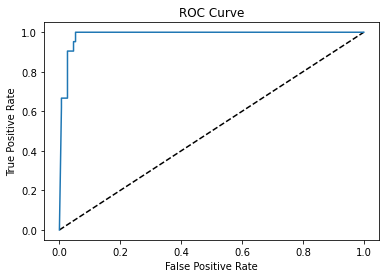

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [1.35295732e-188 1.40660205e-189 5.10534673e-190 5.10534673e-190
 7.27694211e-189 2.34217624e-007 1.48605122e-146 7.27694211e-189
 1.59628737e-189 2.67359323e-188]


In [163]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_gb = gb.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_gb)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_gb[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_gb[0:10]))

In [164]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_gb)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9865972879217912


### Stochastic Gradient Boosting

- Gradient Boosting: Cons & Pros
  - GB involves an exhaustive search procedure
  - Each CART is trained to find the best split points and features.
  - May lead to CARTs using the same split points and maybe the same features.

- Stochastic Gradient Boosting
  - Each tree is trained on a random subset of rows of the training data.
  - The samples instances (40%-80% of the training set) are sampled without replacement.
  - Features are sampled (without replacement) when choosing split points.
  - Result: further ensemble diversity.
  - Effect: adding further variance to the ensemble of trees.

**Stochastic Gradient Boosting: Training**

<img src="https://www.ryangineer.com/assets/img-stochastic-gradient-boosting.png"/>

- Residual errors are multiplied by the learning rate \etaη and are fed to the next tree in ensemble.
- Process is repeated sequentially until all the trees in the ensemble are trained.

**Parameters Used In This Part**
- **max_depth** (int, default=3):\
The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- **subsample** (float, default=1.0):\
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
- **max_features** ({‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None):\
The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If ‘auto’, then max_features=sqrt(n_features).
  - If ‘sqrt’, then max_features=sqrt(n_features).
  - If ‘log2’, then max_features=log2(n_features).
  - If None, then max_features=n_features.
Choosing max_features < n_features leads to a reduction of variance and an increase in bias.\ 

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **n_estimators** (int, default=100):\
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- **random_state** (int, RandomState instance or None, default=None):\
Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls.

In [165]:
# Instantiate sgbr
sgbr = GradientBoostingClassifier(max_depth=5, subsample=0.1,max_features=0.75,n_estimators=200,random_state=7)

# Fit sgbr to the training set
sgbr.fit(x_temp_fold,y_temp_fold)

# Predict test set labels
y_pred_sgbr = sgbr.predict(x_test_fold)

# Compute test set MSE
mse_test = MSE(y_test_fold,y_pred_sgbr)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 0.132


In [166]:
# Generate the confusion matrix and classification report
cm_sgbr = confusion_matrix(y_test_fold, y_pred_sgbr)
cr_sgbr = classification_report(y_test_fold, y_pred_sgbr)

print(cm_sgbr)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_sgbr[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_sgbr[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_sgbr[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_sgbr[1, 1]))

print(cr_sgbr)

# Print out count of binary predictions
print(pd.Series(y_pred_sgbr).value_counts())

[[148   3]
 [  0  21]]
The number of true negative is (Predict/Actual are both 0): 148
The number of false negative is (Predict 0,Actual 1): 0
The number of false positive is (Predict 1,Actual 0): 3
The number of true positives is (Predict/Actual are both 1): 21
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       151
           1       0.88      1.00      0.93        21

    accuracy                           0.98       172
   macro avg       0.94      0.99      0.96       172
weighted avg       0.98      0.98      0.98       172

0    148
1     24
dtype: int64


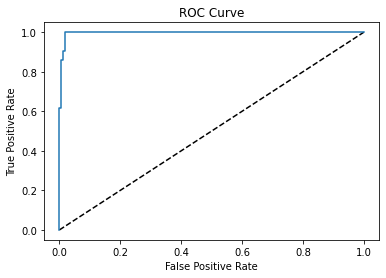

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [5.95010694e-06 1.36676508e-05 3.53094856e-05 4.70021668e-06
 7.41448643e-06 2.38099780e-01 3.39149971e-03 1.30450971e-05
 4.90775672e-05 6.56110333e-06]


In [167]:
# Compute predicted probabilities: y_pred_prob_bag_Randomized_dt_best_model
y_pred_prob_sgbr = sgbr.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_sgbr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_sgbr[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_sgbr[0:10]))

In [168]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_sgbr)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = bag_Grid_gnb_best_model ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9959003468937244


# Conclusion Part 2

In [169]:
classifiers = np.array(["K-Nearest Neighbors(GridSearchCV)","K-Nearest Neighbors(GridSearchCV)_bagging"])
Precision = np.array([0.83,0.79])
Recall = np.array([0.90,0.90])
f1_score = np.array([0.86,0.84])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,K-Nearest Neighbors(GridSearchCV),0.83,0.9,0.86
1,K-Nearest Neighbors(GridSearchCV)_bagging,0.79,0.9,0.84


In [170]:
classifiers = np.array(["K-Nearest Neighbors(Iteration)","K-Nearest Neighbors(Iteration)_bagging"])
Precision = np.array([0.83,0.79])
Recall = np.array([0.90,0.90])
f1_score = np.array([0.86,0.84])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,K-Nearest Neighbors(Iteration),0.83,0.9,0.86
1,K-Nearest Neighbors(Iteration)_bagging,0.79,0.9,0.84


In [171]:
classifiers = np.array(["Logistic Regression(GridSearchCV)","Logistic Regression(GridSearchCV)_bagging","Logistic Regression(GridSearchCV)_Adaboost"])
Precision = np.array([0.86,0.95,0.75])
Recall = np.array([0.86,0.86,0.86])
f1_score = np.array([0.86,0.90,0.80])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Logistic Regression(GridSearchCV),0.86,0.86,0.86
1,Logistic Regression(GridSearchCV)_bagging,0.95,0.86,0.90
2,Logistic Regression(GridSearchCV)_Adaboost,0.75,0.86,0.80


In [172]:
classifiers = np.array(["Decision Trees(RandomizedSearchCV)","Decision Trees(RandomizedSearchCV)_bagging","Decision Trees(RandomizedSearchCV)_Adaboost"])
Precision = np.array([0.79,0.90,0.91])
Recall = np.array([0.90,0.90,0.95])
f1_score = np.array([0.84,0.90,0.93])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Decision Trees(RandomizedSearchCV),0.79,0.90,0.84
1,Decision Trees(RandomizedSearchCV)_bagging,0.90,0.90,0.90
2,Decision Trees(RandomizedSearchCV)_Adaboost,0.91,0.95,0.93


In [173]:
classifiers = np.array(["Decision Trees(GridSearchCV)","Decision Trees(GridSearchCV)_bagging","Decision Trees(GridSearchCV)_Adaboost"])
Precision = np.array([0.79,0.90,0.88])
Recall = np.array([0.90,0.90,1.00])
f1_score = np.array([0.84,0.90,0.93])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Decision Trees(GridSearchCV),0.79,0.9,0.84
1,Decision Trees(GridSearchCV)_bagging,0.90,0.9,0.90
2,Decision Trees(GridSearchCV)_Adaboost,0.88,1.0,0.93


In [174]:
classifiers = np.array(["Non-linear Support Vector Machines(GridSearchCV)","Non-linear Support Vector Machines(GridSearchCV)_bagging","Non-linear Support Vector Machines(GridSearchCV)_Adaboost"])
Precision = np.array([0.86,0.95,0.85])
Recall = np.array([0.90,0.86,0.81])
f1_score = np.array([0.88,0.90,0.83])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Non-linear Support Vector Machines(GridSearchCV),0.86,0.90,0.88
1,Non-linear Support Vector Machines(GridSearchC...,0.95,0.86,0.90
2,Non-linear Support Vector Machines(GridSearchC...,0.85,0.81,0.83


In [175]:
classifiers = np.array(["Linear Support Vector Machines(GridSearchCV)","Linear Support Vector Machines(GridSearchCV)_bagging","Linear Support Vector Machines(GridSearchCV)_Adaboost"])
Precision = np.array([0.90,0.95,0.88])
Recall = np.array([0.86,0.86,0.71])
f1_score = np.array([0.88,0.90,0.79])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Linear Support Vector Machines(GridSearchCV),0.90,0.86,0.88
1,Linear Support Vector Machines(GridSearchCV)_b...,0.95,0.86,0.90
2,Linear Support Vector Machines(GridSearchCV)_A...,0.88,0.71,0.79


In [176]:
classifiers = np.array(["Gaussian Naïve Bayes(GridSearchCV)","Gaussian Naïve Bayes(GridSearchCV)_bagging","Gaussian Naïve Bayes(GridSearchCV)_Adaboost"])
Precision = np.array([0.63,0.68,0.95])
Recall = np.array([0.81,0.90,0.90])
f1_score = np.array([0.71,0.78,0.93])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Gaussian Naïve Bayes(GridSearchCV),0.63,0.81,0.71
1,Gaussian Naïve Bayes(GridSearchCV)_bagging,0.68,0.90,0.78
2,Gaussian Naïve Bayes(GridSearchCV)_Adaboost,0.95,0.90,0.93


In [177]:
classifiers = np.array(["Random Forests","Random Forests_Adaboost"])
Precision = np.array([0.91,0.86])
Recall = np.array([0.95,0.90])
f1_score = np.array([0.93,0.88])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Random Forests,0.91,0.95,0.93
1,Random Forests_Adaboost,0.86,0.90,0.88


In [178]:
classifiers = np.array(["Gradient Boosting","Stochastic Gradient Boosting"])
Precision = np.array([0.83,0.88])
Recall = np.array([0.90,1.00])
f1_score = np.array([0.86,0.93])
  
precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,Gradient Boosting,0.83,0.9,0.86
1,Stochastic Gradient Boosting,0.88,1.0,0.93


## Best of the best models

In [179]:
classifiers = np.array(["K-Nearest Neighbors(GridSearchCV)","K-Nearest Neighbors(Iteration)","Logistic Regression(GridSearchCV)_bagging","Decision Trees(RandomizedSearchCV)_Adaboost","Decision Trees(GridSearchCV)_Adaboost","Non-linear Support Vector Machines(GridSearchCV)","Linear Support Vector Machines(GridSearchCV)_bagging","Gaussian Naïve Bayes(GridSearchCV)_Adaboost","Random Forests","Gradient Boosting","Stochastic Gradient Boosting"])
Precision = np.array([0.83,0.83,0.95,0.91,0.88,0.86,0.95,0.95,0.91,0.83,0.88])
Recall = np.array([0.90,0.9,0.86,0.95,1.0,0.90,0.86,0.90,0.95,0.9,1.0])
f1_score = np.array([0.86,0.86,0.90,0.93,0.93,0.88,0.90,0.93,0.93,0.86,0.93])

precision_And_recall_data = pd.DataFrame({"Classifiers": classifiers,"Precision of postive class (1)": Precision, "Recall of postive class (1)": Recall, "f1-score of postive class (1)":f1_score})
precision_And_recall_data

,Classifiers,Precision of postive class (1),Recall of postive class (1),f1-score of postive class (1)
0,K-Nearest Neighbors(GridSearchCV),0.83,0.90,0.86
1,K-Nearest Neighbors(Iteration),0.83,0.90,0.86
2,Logistic Regression(GridSearchCV)_bagging,0.95,0.86,0.90
3,Decision Trees(RandomizedSearchCV)_Adaboost,0.91,0.95,0.93
4,Decision Trees(GridSearchCV)_Adaboost,0.88,1.00,0.93
5,Non-linear Support Vector Machines(GridSearchCV),0.86,0.90,0.88
6,Linear Support Vector Machines(GridSearchCV)_b...,0.95,0.86,0.90
7,Gaussian Naïve Bayes(GridSearchCV)_Adaboost,0.95,0.90,0.93
8,Random Forests,0.91,0.95,0.93
9,Gradient Boosting,0.83,0.90,0.86


## Voting Classifier of best of the best models

In [180]:
# # Define the list classifiers
# classifiers = [("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),("K-Nearest Neighbors(Iteration)",knn),("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),("Decision Trees(RandomizedSearchCV)_Adaboost",ada_Randomized_dt_best_model),("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)",Grid_NonLinear_svm_best_model),("Linear Support Vector Machines(GridSearchCV)_bagging",bag_Grid_Linear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),("Random Forests",rf),("Gradient Boosting",gb),("Stochastic Gradient Boosting",sgbr)]

# # Define the list classifiers
# classifiers = [("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),("Decision Trees(GridSearchCV)_Adaboost",ada_Grid_dt_best_model),("Non-linear Support Vector Machines(GridSearchCV)",Grid_NonLinear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model)]

# Define the list classifiers
classifiers = [("K-Nearest Neighbors(GridSearchCV)",Grid_knn_best_model),("Logistic Regression(GridSearchCV)_bagging",bag_Grid_logreg_best_model),("Linear Support Vector Machines(GridSearchCV)_bagging",bag_Grid_Linear_svm_best_model),("Gaussian Naïve Bayes(GridSearchCV)_Adaboost",ada_Grid_gnb_best_model),("Stochastic Gradient Boosting",sgbr)]



# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(x_temp_fold, y_temp_fold)    
   
    # Predict y_pred
    y_pred_clfs = clf.predict(x_test_fold)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_fold, y_pred_clfs) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

K-Nearest Neighbors(GridSearchCV) : 0.965
Logistic Regression(GridSearchCV)_bagging : 0.977
Linear Support Vector Machines(GridSearchCV)_bagging : 0.977
Gaussian Naïve Bayes(GridSearchCV)_Adaboost : 0.983
Stochastic Gradient Boosting : 0.983


In [181]:
# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers,voting='soft', n_jobs = -1)

# print(vc.get_params())

# Fit vc to the training set
vc.fit(x_temp_fold, y_temp_fold)   

# Evaluate the test set predictions
y_pred_vc = vc.predict(x_test_fold)

# Calculate accuracy score
accuracy = accuracy_score(y_test_fold, y_pred_vc)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy))

Voting Classifier accuracy: 0.983


In [182]:
# Generate the confusion matrix and classification report
cm_vc = confusion_matrix(y_test_fold, y_pred_vc)
cr_vc = classification_report(y_test_fold, y_pred_vc)

print(cm_vc)

# Print the true negative (actual 0s that were predicted 0s)
print("The number of true negative is (Predict/Actual are both 0): {}".format(cm_vc[0, 0]))

# Print the false negative (actual 1s that were predicted 0s)
print("The number of false negative is (Predict 0,Actual 1): {}".format(cm_vc[1, 0]))

# Print the false positive (actual 0s that were predicted 1s)
print("The number of false positive is (Predict 1,Actual 0): {}".format(cm_vc[0, 1]))

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is (Predict/Actual are both 1): {}".format(cm_vc[1, 1]))

print(cr_vc)

# Print out count of binary predictions
print(pd.Series(y_pred_vc).value_counts())

[[149   2]
 [  1  20]]
The number of true negative is (Predict/Actual are both 0): 149
The number of false negative is (Predict 0,Actual 1): 1
The number of false positive is (Predict 1,Actual 0): 2
The number of true positives is (Predict/Actual are both 1): 20
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.91      0.95      0.93        21

    accuracy                           0.98       172
   macro avg       0.95      0.97      0.96       172
weighted avg       0.98      0.98      0.98       172

0    150
1     22
dtype: int64


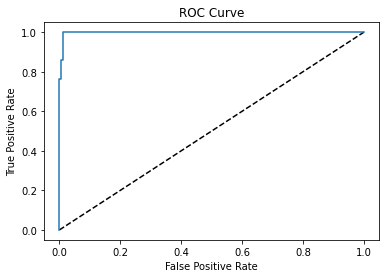

The first 10 predicted values are: [0 0 0 0 0 0 0 0 0 0]
The first 10 predicted probabilities are: [0.13537889 0.05393204 0.02534623 0.00693239 0.0093664  0.31265669
 0.01196427 0.01085803 0.2302968  0.03965547]


In [183]:
# Compute predicted probabilities: y_pred_prob_Grid_knn
y_pred_prob_vc = vc.predict_proba(x_test_fold)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob_vc)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the first 10 values from predictions
print('The first 10 predicted values are: {}'.format(y_pred_vc[0:10]))

# Print the first 10 values from probability_predictions (The probability of not recovering from covid)
print('The first 10 predicted probabilities are: {}'.format(y_pred_prob_vc[0:10]))

In [184]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_fold, y_pred_prob_vc)))

# # Compute cross-validated AUC scores: cv_auc
# cv_auc = cross_val_score(estimator = vc ,X = features_array, y = target_array, cv = 108, scoring = 'roc_auc')


# # Print list of AUC scores
# print("AUC scores computed using 108-fold cross-validation: {}".format(cv_auc))

# # Report the mean and standard deviation
# print('The mean: {}'.format(cv_auc.mean()))
# print('The std: {}'.format(cv_auc.std()))

AUC: 0.9974771365499843


# Extra Information

**Hyperparameters**\
Parameters are learned from data & include CART examples such as split-point of node & split-feature of node. Hyperparameters are not learned from the data & must be set prior to training. CART examples include maximum depth, minimum samples leaf & splitting criterion.
Approaches include:\
- **Grid Search**
  - Manually set a grid of discrete Hyperparameter values.
  - Set a metric for scoring model performance.
  - Search exhaustively through the grid.
  - For each set of hyperparameters, evaluate each model's CV score.
  - The optimal hyperparameters are those of the model achieving the best CV score.
  - Suffers from the curse of dimensionality ⇒ the bigger the grid the longer it takes to find the solution.
- Random Search
  - A sampling distribution is defined for every hyperparameter to do a random search.
  - This technique allows us to control the number of attempted hyperparameter combinations.
  - Unlike grid search, where every possible combination is attempted, random search allows us to specify the number of models to train.
- Bayesian Optimization
- Genetic Algorithms

**Feature Scaling**\
Some features in your data may be represented by measurements in units, some in decimals, & others in thousands, depending on what aspect of reality each feature represents. In our real estate example, one feature could be the number of rooms, another one could be the percentage of certain pollutants in the air, and finally, the average value of a house in the neighborhood. When it is the case that the features have a different scale, though the algorithm will be processing each of them separately, optimization will be dominated by the variables with the more extensive scale. Working in a space of dissimilar dimensions will require more iterations before convergence to a solution (& sometimes there might be no convergence at all).
&emps; The remedy is very easy; it is just necessary to put all the features on the same scale . . . Feature scaling can be achieved through standardization or normalization. Normalization rescales all the values in the interval between zero & one (usually, but different ranges are also possible), whereas standardization operates by removing the mean & dividing by standard deviation to obtain a unit variance. 

**ROC (Receiver Operating Characteristics) Curve**\
The receiver operating characteristic (ROC) curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters.

**AUC (Area Under the ROC Curve)**\
AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.